# Importações das Bibliotecas e criação das funções auxiliares

In [1]:
import numpy as np # Biblioteca para manipulação de matrizes
import pandas as pd # Biblioteca para manipulação de datasets
from sklearn import metrics
import pandas as pd
import sklearn.metrics as metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

import time # Bibliteca para cálculo de tempo
start_time = time.time()

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
def OHE(Dataset,column):

   ### Função de transformação categórica ###

  ''' Esta função trasnforma as variáveis categóricas em valores numéricos pertencentes para utilização no modelo 
      de Machine Learning'''


  enc = LabelEncoder()
  ohe = OneHotEncoder()

  target = enc.fit_transform(Dataset[column])
  target = target.reshape(len(target),1)
  target = ohe.fit_transform(target)
  return target


In [3]:
def mapping_class(data, map_class):

  ### Função de mapeamento de classe ###

  ''' Esta função realiza o mapeamento da série de entrada utilizando um dicionário pré-definido'''

  dataframe = pd.DataFrame(data)
  transf = dataframe[0].map(map_class)


  return transf

In [4]:
from sklearn.model_selection import GridSearchCV

### Funções para utilização da validação cruzada ###

''' Estas funções são utilizadas para realizar o método de validação cruzada através do GridSearchCV
      a fim de encontrar os melhores hiperparâmetros do modelo de Machine Learning '''


def config_param(MLmodel, param, cv= None, n_jobs=-1, scoring = 'balanced_accuracy'):
    
    grid_class = GridSearchCV(MLmodel, param, cv=cv,n_jobs=n_jobs, scoring = scoring)
    
    return MLmodel, grid_class

def get_param(MLmodel, param, X,Y):    
    
    MLmodel, grid_class = config_param(MLmodel, param)
    
    return grid_class.fit(X,Y)


def best_model(MLmodel,data_X,data_y,):
  all_param = get_param(MLmodel, param, data_X,data_y)
  best_result = all_param.best_estimator_
  return best_result
  
    

In [5]:
def plot_results(y_pred,y_real):

  ### Função de plotagem da matriz de confusão ###

  ''' Esta função realiza o plot da matriz de confusão para análise visual do desempenho '''

  # Criando a matrix de confusão para análise de eficiência
  cnf_matrix = metrics.confusion_matrix(y_pred, y_real)
  
  # Plotagem da matriz de confusão e um Heatmap
  class_names=[0,1] #  Nome das classes
  fig, ax = plt.subplots()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)
  
  # Creando o heatmap com a matriz de confusão
  sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
  ax.xaxis.set_label_position("bottom")
  plt.tight_layout()
  plt.title('Matriz de Confusão', y=1.1)
  plt.ylabel('Valor real')
  plt.xlabel('Valor previsto')

In [6]:
from sklearn.preprocessing import StandardScaler # Normalização

def normalize(X):

  ### Função de normalização ###

  ''' Esta função normaliza as variáveis numéricas para utilização no modelo 
      de Machine Learning'''
      
  scaler = StandardScaler()
  scaler.fit(X)
  normalized = scaler.transform(X)
  dataframe = pd.DataFrame(normalized)
  return dataframe



In [7]:
from sklearn.decomposition import PCA # Principal Component Analysis (PCA)

def PCA_apply(data, n_components):

  ### Função de redutora de dimensionalidade ###

  ''' Esta função reduz a dimensionalidade do conjunto de dados para melhor visualização/ explicação do dataset'''
  
  pca = PCA(n_components)
  reduced = pca.fit_transform(data)
  dataframe = pd.DataFrame(reduced)
  return dataframe
  


In [8]:
from imblearn.over_sampling import SMOTE

def SMOTE_apply(data_X, data_y, aproach):

  ### Função de aplicação do SMOTE ###

  ''' Esta função aplica a metodologia de Synthetic Minority Oversampling Technique
      para balancear o modelo de treino com mais amostras da classe minoritária'''
      
  smote = SMOTE(sampling_strategy=aproach)
  X_balanc, y_balanc = smote.fit_resample(data_X, data_y)
  return X_balanc, y_balanc



/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [9]:
def ROC_Plot(y_true, y_score):

  ### Função Plotagem Gráfico ROC ###

  ''' Esta função realiza a plotagem do gráfico de análise ROC '''

  TPR, FPR, thresholds = metrics.roc_curve(y_true, y_score)
  plt.plot(TPR, FPR, label='ROC')
  plt.plot([0, 1], [0, 1], label='Random Choice')
  plt.legend(loc='best')
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.title('Curva ROC do modelo')
  plt.show()



In [10]:
def bin_metrics(y_true, y_pred, y_score):

   ### Função de cálculo de desempenho do classificador binário ###

  ''' Esta função calcula métricas de desempenho do modelo de Machine Learning e retonra
      um vetor contendo os valores (0 < valor < 1) '''


  accur = metrics.accuracy_score(y_true, y_pred)
  precision = metrics.precision_score(y_true, y_pred)
  recall = metrics.recall_score(y_true, y_pred)
  f1 = metrics.f1_score(y_true, y_pred)
  fbeta = metrics.fbeta_score(y_true, y_pred, beta=0.5)
  balanced_score = metrics.balanced_accuracy_score(y_true, y_pred)
  roc_score = metrics.roc_auc_score(y_true, y_score)
  hinge_loss = metrics.hinge_loss(y_true, y_pred)
  harmming_loss = metrics.hamming_loss(y_true, y_pred)
  MMC = metrics.matthews_corrcoef(y_true, y_pred)
  Fm = (balanced_score + fbeta + roc_score)/3
  return accur, precision, recall, f1, fbeta, balanced_score, roc_score, MMC, Fm


In [11]:
def multi_metrics(y_true, y_pred, y_score):

  ### Função de cálculo de desempenho do classificador multiclasse ###

  ''' Esta função calcula métricas de desempenho do modelo de Machine Learning e retonra
      um vetor contendo os valores (0 < valor < 1) '''


  accur = metrics.accuracy_score(y_true, y_pred)
  precision = metrics.precision_score(y_true, y_pred, average = "weighted")
  recall = metrics.recall_score(y_true, y_pred, average = "weighted")
  f1 = metrics.f1_score(y_true, y_pred,average = "weighted")
  fbeta = metrics.fbeta_score(y_true, y_pred, beta=0.5,average = "weighted")
  balanced_score = metrics.balanced_accuracy_score(y_true, y_pred)
  roc_score = metrics.roc_auc_score(y_true, y_score, multi_class="ovr", average="weighted")
  MMC = metrics.matthews_corrcoef(y_true, y_pred)
  Fm = (balanced_score + fbeta + roc_score)/3
  return accur, precision, recall, f1, fbeta, balanced_score, roc_score, MMC, Fm



# Manipulação dos Datasets e criação dos conjuntos de treino - teste

In [12]:
data_folder_path  = '/content/drive/My Drive/Colab Notebooks/TCC/PH2/Datafeature/'
full_data = pd.read_csv(data_folder_path + 'Full_Data_PH2_Final.csv')
full_data = full_data.drop(['Unnamed: 0'],axis=1)
full_data.head(7)

,img_id,asymmetry,pigment_net,dots_glob,streaks,regressionA,blue_whit,Color_W,Color_R,Color_L_B,Color_D_B,Color_B_G,Color_B,Rmed,Gmed,Bmed,Rvar,Gvar,Bvar,Rstd,Gstd,Bstd,Graymed,Grayvar,Graystd,raio,area,perimetro,asymetriX,asymetriY,difarea,ampabs,Rmax,Rmin,Rmdn,RQ25,RQ75,Rmod,Ramp,Rsta,...,LUV_LQ75,LUV_Lmod,LUV_Lamp,LUV_Lsta,LUV_Lgeo,LUV_Lhar,LUV_Lmode_len,LUV_Umed,LUV_Uvar,LUV_Ustd,LUV_Umax,LUV_Umin,LUV_Umdn,LUV_UQ25,LUV_UQ75,LUV_Umod,LUV_Uamp,LUV_Usta,LUV_Ugeo,LUV_Uhar,LUV_Umode_len,LUV_Vmed,LUV_Vvar,LUV_Vstd,LUV_Vmax,LUV_Vmin,LUV_Vmdn,LUV_VQ25,LUV_VQ75,LUV_Vmod,LUV_Vamp,LUV_Vsta,LUV_Vgeo,LUV_Vhar,LUV_Vmode_len,Class,histo_diagnosis,Common_Nevus,Atypical_Nevus,Melanoma
0,IMD003,Simétrico,Típico,Ausente,Ausente,Ausente,Ausente,0,0,0,1,0,0,141.026145,99.907090,95.599948,666.966775,526.681733,475.752436,25.825700,22.949548,21.811750,111.711304,553.897024,23.535017,144,49483.5,909.335130,908,534,11958.897376,0.335784,255,45,138.0,123.0,157.0,128,210,20.383260,...,132.0,113.0,240.0,18.431535,115.244210,112.811707,1,115.783022,9.068789,3.011443,129,93,116.0,114.0,118.0,116,36,2.390265,115.743774,115.704428,1,144.750281,9.690762,3.112999,158,131,145.0,143.0,147.0,143,27,2.520738,144.716917,144.683662,1,Common Nevus,0,1,0,0
1,IMD009,Simétrico,Típico,Ausente,Ausente,Ausente,Ausente,0,0,1,0,0,0,174.015069,116.736129,81.192699,507.485333,485.600350,389.236582,22.527435,22.036342,19.729080,129.811612,472.573475,21.738755,133,49747.0,839.577770,78,896,12413.876730,0.175739,255,45,175.0,156.0,193.0,160,210,19.193162,...,156.0,123.0,240.0,18.106582,136.032494,134.014615,1,127.102048,6.780058,2.603854,139,97,127.0,125.0,129.0,128,42,2.080070,127.075215,127.048209,1,165.826740,17.690416,4.205998,179,140,166.0,163.0,169.0,167,39,3.422543,165.773142,165.719271,1,Common Nevus,0,1,0,0
2,IMD016,Simétrico,Típico,Típico,Ausente,Ausente,Ausente,0,0,1,1,0,0,170.306554,91.814428,53.234401,603.953999,435.527667,312.169675,24.575476,20.869300,17.668324,110.887407,453.013872,21.284123,181,73324.5,1089.442777,1654,2458,14639.691990,0.312090,255,73,169.0,151.0,188.0,156,182,20.263873,...,135.0,110.0,222.0,17.155740,118.849109,117.016566,1,140.293178,18.438867,4.294050,155,98,141.0,137.0,143.0,142,57,3.449991,140.226800,140.159710,1,167.593579,26.853305,5.182017,184,145,167.0,164.0,171.0,165,39,4.262179,167.513653,167.433913,1,Common Nevus,0,1,0,0
3,IMD022,Simétrico,Típico,Ausente,Ausente,Ausente,Ausente,0,0,1,0,0,0,179.164652,99.801229,38.776840,639.841271,563.731281,352.310635,25.295084,23.743026,18.769940,116.574021,546.427010,23.375778,236,119377.5,1592.971778,719,325,18317.579080,0.380035,255,74,177.0,160.0,198.0,163,181,21.037037,...,146.0,115.0,201.0,19.119042,126.070102,124.029360,1,142.234172,13.494300,3.673459,156,112,142.0,140.0,145.0,143,44,2.921374,142.186613,142.138924,1,176.139313,37.688110,6.139064,195,145,176.0,171.0,181.0,172,50,5.086846,176.032638,175.926276,1,Common Nevus,0,1,0,0
4,IMD024,Simétrico,Típico,Ausente,Ausente,Ausente,Ausente,0,0,1,1,0,0,165.550278,110.724523,76.140293,1322.501257,1041.629865,701.094420,36.366210,32.274291,26.478188,123.175569,1066.198326,32.652692,153,36656.5,792.707712,406,530,10083.023408,0.498939,246,68,169.0,136.0,195.0,184,178,30.897303,...,157.0,129.0,171.0,27.661656,126.398991,121.809163,1,125.670514,16.715673,4.088481,137,111,127.0,123.0,129.0,129,26,3.335670,125.602913,125.534198,1,164.661350,42.476885,6.517429,180,145,166.0,159.0,170.0,168,35,5.523483,164.530698,164.398398,1,Common Nevus,0,1,0,0
5,IMD025,Simétrico,Típico,Típico,Ausente,Ausente,Ausente,0,0,1,0,0,0,132.095231,85.111269,60.056989,430.857907,363.144592,292.682972,20.757117,19.056353,17.107980,96.303927,366.204572,19.136472,204,77347.5,1270.947386,1960,2056,14770.609200,0.452339,218,67,130.0,115.0,147.0,111,151,17.503350,...,119.0,83.0,153.0,16.650620,101.586290,99.822148,1,120.969951,8.819690,2.969796,134,110,121.0,119.0,123.0,120,24,2.359139,120.933627,120.897426,1,157.584046,14.754413,3.841147,171,142,157.0,155.0,160.0,157,29,3.15617

In [13]:
full_data.columns

Index(['img_id', 'asymmetry', 'pigment_net', 'dots_glob', 'streaks',
       'regressionA', 'blue_whit', 'Color_W', 'Color_R', 'Color_L_B',
       ...
       'LUV_Vamp', 'LUV_Vsta', 'LUV_Vgeo', 'LUV_Vhar', 'LUV_Vmode_len',
       'Class', 'histo_diagnosis', 'Common_Nevus', 'Atypical_Nevus',
       'Melanoma'],
      dtype='object', length=317)

In [14]:
assimetria = OHE(full_data,'asymmetry')
pigmento = OHE(full_data,'pigment_net')
pontos = OHE(full_data,'dots_glob')
estria = OHE(full_data,'streaks')
regressao = OHE(full_data,'regressionA')
blue_whit = OHE(full_data,'blue_whit')
dataset_array = np.concatenate([assimetria.toarray(), pigmento.toarray(), pontos.toarray(),
                                estria.toarray(), regressao.toarray(),
                                blue_whit.toarray()], axis=1)
dataset_array = pd.DataFrame(dataset_array)
dataset_array.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
6,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
7,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
8,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
9,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


In [15]:
dataset_array.columns = ['Assim: S.','Assim: P.A.','Assim: T.A.','Pig: Típico','Pigm: Atípico',
                          'PG: Ausente','PG: Típico','PG: Atípico','Estria: Ausente', 'Estria: Presente',
                         'Regre: Ausente', 'Regre: Presente', 'Blue_Whit: Ausente', 'Blue_Whit: Presente']
                    
dataset_array.head(5)

,Assim: S.,Assim: P.A.,Assim: T.A.,Pig: Típico,Pigm: Atípico,PG: Ausente,PG: Típico,PG: Atípico,Estria: Ausente,Estria: Presente,Regre: Ausente,Regre: Presente,Blue_Whit: Ausente,Blue_Whit: Presente
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [16]:
full_data = full_data.drop(['img_id', 'asymmetry', 'pigment_net', 'dots_glob', 'streaks',
       'regressionA', 'blue_whit'],axis = 1)
full_data = pd.concat([dataset_array,full_data], axis = 1)

In [17]:
full_data.head(3)

,Assim: S.,Assim: P.A.,Assim: T.A.,Pig: Típico,Pigm: Atípico,PG: Ausente,PG: Típico,PG: Atípico,Estria: Ausente,Estria: Presente,Regre: Ausente,Regre: Presente,Blue_Whit: Ausente,Blue_Whit: Presente,Color_W,Color_R,Color_L_B,Color_D_B,Color_B_G,Color_B,Rmed,Gmed,Bmed,Rvar,Gvar,Bvar,Rstd,Gstd,Bstd,Graymed,Grayvar,Graystd,raio,area,perimetro,asymetriX,asymetriY,difarea,ampabs,Rmax,...,LUV_LQ75,LUV_Lmod,LUV_Lamp,LUV_Lsta,LUV_Lgeo,LUV_Lhar,LUV_Lmode_len,LUV_Umed,LUV_Uvar,LUV_Ustd,LUV_Umax,LUV_Umin,LUV_Umdn,LUV_UQ25,LUV_UQ75,LUV_Umod,LUV_Uamp,LUV_Usta,LUV_Ugeo,LUV_Uhar,LUV_Umode_len,LUV_Vmed,LUV_Vvar,LUV_Vstd,LUV_Vmax,LUV_Vmin,LUV_Vmdn,LUV_VQ25,LUV_VQ75,LUV_Vmod,LUV_Vamp,LUV_Vsta,LUV_Vgeo,LUV_Vhar,LUV_Vmode_len,Class,histo_diagnosis,Common_Nevus,Atypical_Nevus,Melanoma
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0,0,0,1,0,0,141.026145,99.907090,95.599948,666.966775,526.681733,475.752436,25.825700,22.949548,21.811750,111.711304,553.897024,23.535017,144,49483.5,909.335130,908,534,11958.897376,0.335784,255,...,132.0,113.0,240.0,18.431535,115.244210,112.811707,1,115.783022,9.068789,3.011443,129,93,116.0,114.0,118.0,116,36,2.390265,115.743774,115.704428,1,144.750281,9.690762,3.112999,158,131,145.0,143.0,147.0,143,27,2.520738,144.716917,144.683662,1,Common Nevus,0,1,0,0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0,0,1,0,0,0,174.015069,116.736129,81.192699,507.485333,485.600350,389.236582,22.527435,22.036342,19.729080,129.811612,472.573475,21.738755,133,49747.0,839.577770,78,896,12413.876730,0.175739,255,...,156.0,123.0,240.0,18.106582,136.032494,134.014615,1,127.102048,6.780058,2.603854,139,97,127.0,125.0,129.0,128,42,2.080070,127.075215,127.048209,1,165.826740,17.690416,4.205998,179,140,166.0,163.0,169.0,167,39,3.422543,165.773142,165.719271,1,Common Nevus,0,1,0,0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0,0,1,1,0,0,170.306554,91.814428,53.234401,603.953999,435.527667,312.169675,24.575476,20.869300,17.668324,110.887407,453.013872,21.284123,181,73324.5,1089.442777,1654,2458,14639.691990,0.312090,255,...,135.0,110.0,222.0,17.155740,118.849109,117.016566,1,140.293178,18.438867,4.294050,155,98,141.0,137.0,143.0,142,57,3.449991,140.226800,140.159710,1,167.593579,26.853305,5.182017,184,145,167.0,164.0,171.0,165,39,4.262179,167.513653,167.433913,1,Common Nevus,0,1,0,0


In [18]:
full_data.columns

Index(['Assim: S.', 'Assim: P.A.', 'Assim: T.A.', 'Pig: Típico',
       'Pigm: Atípico', 'PG: Ausente', 'PG: Típico', 'PG: Atípico',
       'Estria: Ausente', 'Estria: Presente',
       ...
       'LUV_Vamp', 'LUV_Vsta', 'LUV_Vgeo', 'LUV_Vhar', 'LUV_Vmode_len',
       'Class', 'histo_diagnosis', 'Common_Nevus', 'Atypical_Nevus',
       'Melanoma'],
      dtype='object', length=324)

In [19]:
doc_list = ['Assim: S.','Assim: P.A.','Pigm: Atípico','PG: Típico','PG: Atípico','Estria: Presente',
                     'Regre: Presente', 'Blue_Whit: Presente','Color_W', 'Color_R', 
                    'Color_L_B','Color_D_B', 'Color_B_G', 'Color_B']

img_list = ['raio', 'area', 'perimetro', 'asymetriX', 'asymetriY',
                      'difarea',	'ampabs','Raioamp', 'Raiomax', 'Raiomin',
                      'Raiomed', 'Raiomdn', 'RaioQ25', 'RaioQ75', 'Raiosta',
                      'Raiogeo', 'Raiohar', 'AmpSup','AmpInf','Rmed_adap',
                      'Bmed_adap','Gmed_adap','Graymed_adap',
                      'Rvar_adap','Gvar_adap','Bvar_adap','Grayvar_adap',
                      'Rstd_adap','Gstd_adap','Bstd_adap','Graystd_adap',
                      'Rmax_adap','Gmax_adap','Bmax_adap','Graymax_adap',
                      'Rmin_adap','Gmin_adap','Bmin_adap','Graymin_adap',
                      'Rmdn_adap','Gmdn_adap','Bmdn_adap','Graymdn_adap',
                      'RQ25_adap','GQ25_adap','BQ25_adap','GrayQ25_adap',
                      'RQ75_adap','GQ75_adap','BQ75_adap','GrayQ75_adap',
                      'Rmod_adap','Gmod_adap','Bmod_adap','Graymod_adap',
                      'Ramp_adap','Gamp_adap','Bamp_adap','Grayamp_adap',
                      'Rsta_adap','Gsta_adap','Bsta_adap','Graysta_adap',
                      'Rgeo_adap','Ggeo_adap','Bgeo_adap','Graygeo_adap',
                      'Rhar_adap','Ghar_adap','Bhar_adap','Grayhar_adap',
                      'HSL_Hmed', 'HSL_Hvar', 'HSL_Hstd', 'HSL_Hmax', 'HSL_Hmin', 'HSL_Hmdn',
                      'HSL_HQ25', 'HSL_HQ75', 'HSL_Hmod', 'HSL_Hamp', 'HSL_Hsta', 'HSL_Hgeo',
                      'HSL_Hhar','HSL_Smed', 'HSL_Svar', 'HSL_Sstd', 'HSL_Smax', 'HSL_Smin',
                      'HSL_Smdn','HSL_SQ25', 'HSL_SQ75', 'HSL_Smod', 'HSL_Samp', 'HSL_Ssta',
                      'HSL_Sgeo','HSL_Shar', 'HSL_Lmed', 'HSL_Lvar', 'HSL_Lstd', 'HSL_Lmax',
                      'HSL_Lmin', 'HSL_Lmdn','HSL_LQ25', 'HSL_LQ75', 'HSL_Lmod', 'HSL_Lamp',
                      'HSL_Lsta', 'HSL_Lgeo','HSL_Lhar', 'HSV_Hmed', 'HSV_Hvar', 'HSV_Hstd', 
                      'HSV_Hmax', 'HSV_Hmin', 'HSV_Hmdn','HSV_HQ25', 'HSV_HQ75', 'HSV_Hmod',
                      'HSV_Hamp', 'HSV_Hsta', 'HSV_Hgeo','HSV_Hhar','HSV_Smed', 'HSV_Svar',
                      'HSV_Sstd', 'HSV_Smax', 'HSV_Smin','HSV_Smdn','HSV_SQ25', 'HSV_SQ75',
                      'HSV_Smod', 'HSV_Samp', 'HSV_Ssta', 'HSV_Sgeo','HSV_Shar','HSV_Vmed', 
                      'HSV_Vvar', 'HSV_Vstd', 'HSV_Vmax','HSV_Vmin', 'HSV_Vmdn','HSV_VQ25',
                      'HSV_VQ75', 'HSV_Vmod', 'HSV_Vamp','HSV_Vsta', 'HSV_Vgeo','HSV_Vhar',
                      'LAB_Lmed', 'LAB_Lvar', 'LAB_Lstd', 'LAB_Lmax', 'LAB_Lmin', 'LAB_Lmdn',
                      'LAB_LQ25', 'LAB_LQ75', 'LAB_Lmod', 'LAB_Lamp', 'LAB_Lsta', 'LAB_Lgeo',
                      'LAB_Lhar', 'LAB_Amed', 'LAB_Avar', 'LAB_Astd', 'LAB_Amax', 'LAB_Amin',
                      'LAB_Amdn','LAB_AQ25', 'LAB_AQ75', 'LAB_Amod', 'LAB_Aamp', 'LAB_Asta',
                      'LAB_Ageo','LAB_Ahar', 'LAB_Bmed', 'LAB_Bvar', 'LAB_Bstd', 'LAB_Bmax',
                      'LAB_Bmin', 'LAB_Bmdn','LAB_BQ25', 'LAB_BQ75', 'LAB_Bmod', 'LAB_Bamp',
                      'LAB_Bsta', 'LAB_Bgeo','LAB_Bhar','LUV_Lmed', 'LUV_Lvar', 'LUV_Lstd', 
                      'LUV_Lmax', 'LUV_Lmin', 'LUV_Lmdn','LUV_LQ25', 'LUV_LQ75', 'LUV_Lmod',
                      'LUV_Lamp', 'LUV_Lsta', 'LUV_Lgeo','LUV_Lhar', 'LUV_Umed', 'LUV_Uvar',
                      'LUV_Ustd', 'LUV_Umax', 'LUV_Umin','LUV_Umdn', 'LUV_UQ25', 'LUV_UQ75',
                      'LUV_Umod', 'LUV_Uamp', 'LUV_Usta','LUV_Ugeo', 'LUV_Uhar', 'LUV_Vmed', 
                      'LUV_Vvar', 'LUV_Vstd', 'LUV_Vmax','LUV_Vmin', 'LUV_Vmdn', 'LUV_VQ25',
                      'LUV_VQ75', 'LUV_Vmod', 'LUV_Vamp','LUV_Vsta', 'LUV_Vgeo','LUV_Vhar']

full_list = ['Assim: S.','Assim: P.A.','Pigm: Atípico','PG: Típico','PG: Atípico','Estria: Presente',
             'Regre: Presente', 'Blue_Whit: Presente','Color_W', 'Color_R', 'Color_L_B','Color_D_B', 
             'Color_B_G', 'Color_B','raio', 'area', 'perimetro', 'asymetriX', 'asymetriY',
                      'difarea',	'ampabs','Raioamp', 'Raiomax', 'Raiomin',
                      'Raiomed', 'Raiomdn', 'RaioQ25', 'RaioQ75', 'Raiosta',
                      'Raiogeo', 'Raiohar', 'AmpSup','AmpInf','Rmed_adap',
                      'Bmed_adap','Gmed_adap','Graymed_adap',
                      'Rvar_adap','Gvar_adap','Bvar_adap','Grayvar_adap',
                      'Rstd_adap','Gstd_adap','Bstd_adap','Graystd_adap',
                      'Rmax_adap','Gmax_adap','Bmax_adap','Graymax_adap',
                      'Rmin_adap','Gmin_adap','Bmin_adap','Graymin_adap',
                      'Rmdn_adap','Gmdn_adap','Bmdn_adap','Graymdn_adap',
                      'RQ25_adap','GQ25_adap','BQ25_adap','GrayQ25_adap',
                      'RQ75_adap','GQ75_adap','BQ75_adap','GrayQ75_adap',
                      'Rmod_adap','Gmod_adap','Bmod_adap','Graymod_adap',
                      'Ramp_adap','Gamp_adap','Bamp_adap','Grayamp_adap',
                      'Rsta_adap','Gsta_adap','Bsta_adap','Graysta_adap',
                      'Rgeo_adap','Ggeo_adap','Bgeo_adap','Graygeo_adap',
                      'Rhar_adap','Ghar_adap','Bhar_adap','Grayhar_adap',
                      'HSL_Hmed', 'HSL_Hvar', 'HSL_Hstd', 'HSL_Hmax', 'HSL_Hmin', 'HSL_Hmdn',
                      'HSL_HQ25', 'HSL_HQ75', 'HSL_Hmod', 'HSL_Hamp', 'HSL_Hsta', 'HSL_Hgeo',
                      'HSL_Hhar','HSL_Smed', 'HSL_Svar', 'HSL_Sstd', 'HSL_Smax', 'HSL_Smin',
                      'HSL_Smdn','HSL_SQ25', 'HSL_SQ75', 'HSL_Smod', 'HSL_Samp', 'HSL_Ssta',
                      'HSL_Sgeo','HSL_Shar', 'HSL_Lmed', 'HSL_Lvar', 'HSL_Lstd', 'HSL_Lmax',
                      'HSL_Lmin', 'HSL_Lmdn','HSL_LQ25', 'HSL_LQ75', 'HSL_Lmod', 'HSL_Lamp',
                      'HSL_Lsta', 'HSL_Lgeo','HSL_Lhar', 'HSV_Hmed', 'HSV_Hvar', 'HSV_Hstd', 
                      'HSV_Hmax', 'HSV_Hmin', 'HSV_Hmdn','HSV_HQ25', 'HSV_HQ75', 'HSV_Hmod',
                      'HSV_Hamp', 'HSV_Hsta', 'HSV_Hgeo','HSV_Hhar','HSV_Smed', 'HSV_Svar',
                      'HSV_Sstd', 'HSV_Smax', 'HSV_Smin','HSV_Smdn','HSV_SQ25', 'HSV_SQ75',
                      'HSV_Smod', 'HSV_Samp', 'HSV_Ssta', 'HSV_Sgeo','HSV_Shar','HSV_Vmed', 
                      'HSV_Vvar', 'HSV_Vstd', 'HSV_Vmax','HSV_Vmin', 'HSV_Vmdn','HSV_VQ25',
                      'HSV_VQ75', 'HSV_Vmod', 'HSV_Vamp','HSV_Vsta', 'HSV_Vgeo','HSV_Vhar',
                      'LAB_Lmed', 'LAB_Lvar', 'LAB_Lstd', 'LAB_Lmax', 'LAB_Lmin', 'LAB_Lmdn',
                      'LAB_LQ25', 'LAB_LQ75', 'LAB_Lmod', 'LAB_Lamp', 'LAB_Lsta', 'LAB_Lgeo',
                      'LAB_Lhar', 'LAB_Amed', 'LAB_Avar', 'LAB_Astd', 'LAB_Amax', 'LAB_Amin',
                      'LAB_Amdn','LAB_AQ25', 'LAB_AQ75', 'LAB_Amod', 'LAB_Aamp', 'LAB_Asta',
                      'LAB_Ageo','LAB_Ahar', 'LAB_Bmed', 'LAB_Bvar', 'LAB_Bstd', 'LAB_Bmax',
                      'LAB_Bmin', 'LAB_Bmdn','LAB_BQ25', 'LAB_BQ75', 'LAB_Bmod', 'LAB_Bamp',
                      'LAB_Bsta', 'LAB_Bgeo','LAB_Bhar','LUV_Lmed', 'LUV_Lvar', 'LUV_Lstd', 
                      'LUV_Lmax', 'LUV_Lmin', 'LUV_Lmdn','LUV_LQ25', 'LUV_LQ75', 'LUV_Lmod',
                      'LUV_Lamp', 'LUV_Lsta', 'LUV_Lgeo','LUV_Lhar', 'LUV_Umed', 'LUV_Uvar',
                      'LUV_Ustd', 'LUV_Umax', 'LUV_Umin','LUV_Umdn', 'LUV_UQ25', 'LUV_UQ75',
                      'LUV_Umod', 'LUV_Uamp', 'LUV_Usta','LUV_Ugeo', 'LUV_Uhar', 'LUV_Vmed', 
                      'LUV_Vvar', 'LUV_Vstd', 'LUV_Vmax','LUV_Vmin', 'LUV_Vmdn', 'LUV_VQ25',
                      'LUV_VQ75', 'LUV_Vmod', 'LUV_Vamp','LUV_Vsta', 'LUV_Vgeo','LUV_Vhar']

In [20]:
X = full_data[full_list]
y = full_data[['Common_Nevus', 'Atypical_Nevus',
       'Melanoma','Class']]



In [21]:
categorical_data = full_data[doc_list]
numerical_data = full_data[img_list]
normalized_data = normalize(numerical_data)
X_normalized = pd.concat([categorical_data, normalized_data], axis=1)
X_normalized.columns = full_list

In [22]:
#state = np.random.randint(0,100)
state = 3
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size, random_state = state)
X_train_normalized, X_test_normalized, y_train, y_test = train_test_split(X_normalized,y,
                                                                          test_size=test_size, 
                                                                          random_state = state)



In [23]:
X_train.head()

,Assim: S.,Assim: P.A.,Pigm: Atípico,PG: Típico,PG: Atípico,Estria: Presente,Regre: Presente,Blue_Whit: Presente,Color_W,Color_R,Color_L_B,Color_D_B,Color_B_G,Color_B,raio,area,perimetro,asymetriX,asymetriY,difarea,ampabs,Raioamp,Raiomax,Raiomin,Raiomed,Raiomdn,RaioQ25,RaioQ75,Raiosta,Raiogeo,Raiohar,AmpSup,AmpInf,Rmed_adap,Bmed_adap,Gmed_adap,Graymed_adap,Rvar_adap,Gvar_adap,Bvar_adap,...,LAB_Bhar,LUV_Lmed,LUV_Lvar,LUV_Lstd,LUV_Lmax,LUV_Lmin,LUV_Lmdn,LUV_LQ25,LUV_LQ75,LUV_Lmod,LUV_Lamp,LUV_Lsta,LUV_Lgeo,LUV_Lhar,LUV_Umed,LUV_Uvar,LUV_Ustd,LUV_Umax,LUV_Umin,LUV_Umdn,LUV_UQ25,LUV_UQ75,LUV_Umod,LUV_Uamp,LUV_Usta,LUV_Ugeo,LUV_Uhar,LUV_Vmed,LUV_Vvar,LUV_Vstd,LUV_Vmax,LUV_Vmin,LUV_Vmdn,LUV_VQ25,LUV_VQ75,LUV_Vmod,LUV_Vamp,LUV_Vsta,LUV_Vgeo,LUV_Vhar
156,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0,1,1,0,0,198,51874.5,1029.276253,2224,2946,11819.029761,0.621813,138.004683,221.939181,83.934498,85.094066,132.866474,102.844521,165.966863,32.517108,132.303168,127.617709,26.690621,83.934498,204.874814,85.769848,129.015481,146.784622,1863.317789,1228.382628,533.088521,...,162.811817,154.690742,1234.659102,35.137716,252.0,44.0,158.0,126.0,185.0,197.0,208.0,30.065901,150.357374,145.714270,137.861550,69.290898,8.324115,156,98,140.0,133.0,144.0,143,58,6.774814,137.601188,137.331453,172.126104,107.721603,10.378902,193,142,175.0,164.0,181.0,180,51,8.906398,171.804704,171.474950
115,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0,0,303,174717.5,1663.373793,4534,1538,23226.539020,0.427840,135.105463,315.784737,180.679274,273.001831,237.785618,203.027092,271.523019,32.697681,236.125656,233.252754,19.769534,180.679274,168.890375,61.020799,93.784388,112.539610,355.739192,268.624725,231.518115,...,159.843817,121.632967,276.412857,16.625669,176.0,24.0,122.0,111.0,134.0,124.0,152.0,13.174266,120.384821,118.950614,137.760565,11.677071,3.417173,149,114,138.0,136.0,140.0,138,35,2.470638,137.717365,137.673278,165.044615,13.291272,3.645720,179,142,165.0,163.0,167.0,165,37,2.704091,165.003772,164.962319
155,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,1,1,0,0,207,91130.5,1376.035700,505,6087,14759.894831,0.493323,111.566391,226.152603,114.586212,155.794737,172.689027,159.570514,182.263543,15.578795,169.871643,168.494879,35.443401,114.586212,176.966985,74.357448,120.029362,131.861367,1579.651250,1229.543285,665.028861,...,161.430244,140.012419,1243.539130,35.263850,230.0,28.0,145.0,111.0,168.0,158.0,202.0,29.667127,135.007180,129.395146,127.508870,30.347922,5.508895,141,105,128.0,125.0,131.0,130,36,4.310751,127.386647,127.261046,170.820513,81.678456,9.037613,189,142,173.0,164.0,178.0,175,47,7.459768,170.575270,170.323783
15,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0,1,1,1,0,0,298,175247.5,1768.971772,3749,2899,22661.131720,0.405507,122.236083,301.439878,179.203795,217.082933,237.164495,202.012989,270.097667,33.279227,235.199224,232.331024,11.921312,179.203795,228.231378,111.433598,162.677884,176.452108,94.840589,366.607473,913.155565,...,163.696236,183.563953,218.278535,14.774252,254.0,76.0,186.0,174.0,194.0,190.0,178.0,11.831033,182.948088,182.307209,131.928539,77.174474,8.784900,154,95,130.0,124.0,140.0,124,59,7.584829,131.637975,131.349641,176.055661,57.778147,7.601194,193,140,178.0,171.0,182.0,181,53,6.310026,175.888257,175.717494
61,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,170,68860.0,1140.915864,4264,74,13880.516456,0.450194,80.931045,179.769297,98.838252,160.639348,150.960260,138.220838,162.336071,13.955102,147.656584,146.430572,14.551259,98.838252,184.624650,71.931349,116.378341,131.736497,1616.786107,1454.002079,1299.279579,...,163.015463,140.227427,1423.736072,37.732427,254.0,10.0,145.0,123.0,167.0,137.0,244.0,28.635902,132.597858,118.933211,133.787799,51.747063,7.193543,157,90,135.0,130.0,139.0,137,67,5.605410,133.586336,133.376000,170.413026,64.090001,8.005623,191,135,173.0,167.0,176.0,176,56,6.029407,170.215383,170.007418


In [24]:
X_train_normalized.head()

,Assim: S.,Assim: P.A.,Pigm: Atípico,PG: Típico,PG: Atípico,Estria: Presente,Regre: Presente,Blue_Whit: Presente,Color_W,Color_R,Color_L_B,Color_D_B,Color_B_G,Color_B,raio,area,perimetro,asymetriX,asymetriY,difarea,ampabs,Raioamp,Raiomax,Raiomin,Raiomed,Raiomdn,RaioQ25,RaioQ75,Raiosta,Raiogeo,Raiohar,AmpSup,AmpInf,Rmed_adap,Bmed_adap,Gmed_adap,Graymed_adap,Rvar_adap,Gvar_adap,Bvar_adap,...,LAB_Bhar,LUV_Lmed,LUV_Lvar,LUV_Lstd,LUV_Lmax,LUV_Lmin,LUV_Lmdn,LUV_LQ25,LUV_LQ75,LUV_Lmod,LUV_Lamp,LUV_Lsta,LUV_Lgeo,LUV_Lhar,LUV_Umed,LUV_Uvar,LUV_Ustd,LUV_Umax,LUV_Umin,LUV_Umdn,LUV_UQ25,LUV_UQ75,LUV_Umod,LUV_Uamp,LUV_Usta,LUV_Ugeo,LUV_Uhar,LUV_Vmed,LUV_Vvar,LUV_Vstd,LUV_Vmax,LUV_Vmin,LUV_Vmdn,LUV_VQ25,LUV_VQ75,LUV_Vmod,LUV_Vamp,LUV_Vsta,LUV_Vgeo,LUV_Vhar
156,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0,1,1,0,0,-0.521489,-0.871120,-0.887483,0.060824,0.195261,-0.945786,1.781796,0.635043,-0.350658,-1.067991,-1.373377,-0.912141,-1.156978,-0.684764,0.869947,-0.913797,-0.955156,0.971562,-1.067991,1.003911,0.275918,0.834235,0.896171,1.389927,1.303852,-0.234715,...,0.740480,0.893006,1.205627,1.213138,0.775143,0.640589,0.972412,0.508535,1.281331,1.884810,0.096003,1.284290,0.821949,0.728389,0.910141,0.511060,0.718905,0.777018,-0.319810,1.003627,0.823460,1.013762,1.024360,0.885250,0.646755,0.903318,0.896036,0.897348,1.633565,1.680204,1.036814,0.526506,1.092385,0.561682,1.287515,1.358894,0.399153,1.730438,0.879584,0.861275
115,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0,0,0.670032,0.322752,0.245445,1.025927,-0.322167,0.581814,0.138280,0.577826,0.679990,0.543724,1.216883,0.477206,0.336747,0.611893,0.885184,0.506634,0.500249,0.357329,0.543724,0.014801,-0.749547,-0.630516,-0.411631,-0.979271,-1.263538,-1.188583,...,0.494937,-0.339666,-1.181960,-1.371123,-2.893032,-0.343056,-0.239212,0.001521,-0.582025,-0.023925,-1.675266,-1.324356,-0.259125,-0.142253,0.900800,-0.905826,-1.183233,0.201753,1.596652,0.828091,1.082409,0.648935,0.649959,-0.793987,-1.253315,0.914057,0.927615,0.302914,-0.928748,-1.231929,-0.244899,0.526506,0.281409,0.483887,0.070418,0.283252,-0.842657,-1.265562,0.310949,0.318901
155,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,1,1,0,0,-0.419359,-0.489603,-0.267936,-0.657362,1.349551,-0.551970,0.693114,0.113276,-0.304384,-0.557350,-0.398786,-0.384808,-0.311192,-0.484575,-0.559362,-0.399810,-0.391964,1.748355,-0.557350,0.236805,-0.196949,0.460633,0.326258,0.944138,1.306957,0.182613,...,0.626182,0.345674,1.227753,1.230746,-0.286697,-0.146327,0.534881,0.001521,0.660213,0.865075,-0.093776,1.222705,0.268286,0.197516,-0.047453,-0.446657,-0.372393,-0.455692,0.518642,-0.049589,0.132927,-0.171925,0.050918,-0.720977,-0.441001,-0.040856,-0.034301,0.787754,0.926899,1.100091,0.670610,0.526506,0.930190,0.561682,1.026709,1.000347,0.044350,1.031649,0.776789,0.765406
15,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0,1,1,1,0,0,0.613293,0.327903,0.434114,0.697959,0.177989,0.506099,-0.050946,0.323845,0.522450,0.519144,0.446056,0.468981,0.321626,0.594384,0.934257,0.493959,0.487550,-0.339186,0.519144,1.645917,1.339283,2.233768,2.029158,-1.389280,-1.001431,0.967438,...,0.813648,1.969642,-1.326809,-1.629578,0.871674,2.214421,1.914786,2.130978,1.610159,1.701781,-0.852891,-1.531797,1.997458,1.918785,0.361354,0.704939,0.897524,0.612657,-0.679146,0.125947,0.046611,0.648935,-0.398362,0.958261,1.004335,0.352113,0.343417,1.227202,0.278378,0.478832,1.036814,0.372219,1.335678,1.106249,1.374451,1.430604,0.576555,0.476271,1.221016,1.214596
61,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,-0.839229,-0.706043,-0.688019,0.913122,-0.860174,-0.669729,0.327680,-0.491321,-0.813784,-0.819702,-0.332005,-0.672542,-0.629516,-0.729365,-0.696374,-0.703742,-0.695958,-0.105783,-0.819702,0.447292,-0.297474,0.308839,0.321489,1.002496,1.907393,2.188749,...,0.757328,0.353692,1.676736,1.575357,0.871674,-1.031608,0.534881,0.407132,0.623676,0.315987,1.234675,1.063449,0.181385,-0.142819,0.533330,0.079608,0.280647,0.859198,-1.278040,0.564787,0.564510,0.557729,0.575079,1.542343,0.130524,0.532208,0.530618,0.753549,0.449646,0.653750,0.8537

In [25]:
doc_data_X_train = X_train[doc_list]
doc_data_X_test = X_test[doc_list]


img_data_X_train = X_train[img_list]
img_data_X_test = X_test[img_list]



full_data_X_train = X_train[full_list]
full_data_X_test = X_test[full_list]

In [26]:
y_train_all_class = y_train[['Common_Nevus', 'Atypical_Nevus']] # [1,0] -> CN // [0,1] -> AN // [0,0] -> MELANOMA
y_train_cancer    = y_train[['Melanoma']]
y_train_class     = y_train[['Class']]

y_test_all_class = y_test[['Common_Nevus', 'Atypical_Nevus']] # [1,0] -> CN // [0,1] -> AN // [0,0] -> MELANOMA
y_test_cancer    = y_test[['Melanoma']]
y_test_class     = y_test[['Class']]

In [27]:
doc_data_X_train_normalized = X_train_normalized[doc_list]
doc_data_X_test_normalized = X_test_normalized[doc_list]


img_data_X_train_normalized = X_train_normalized[img_list]
img_data_X_test_normalized = X_test_normalized[img_list]


full_data_X_train_normalized = X_train_normalized[full_list]
full_data_X_test_normalized = X_test_normalized[full_list]

In [28]:
one_class_dic = {'Melanoma':1, 'Common Nevus':0, 'Atypical Nevus':0}
all_class_dic = {'Melanoma':0, 'Common Nevus':1, 'Atypical Nevus':2}

doc_data_X_train_smote, doc_data_y_train_smote = SMOTE_apply(doc_data_X_train ,y_train['Class'],'minority')
doc_data_y_train_smote_2 = mapping_class(doc_data_y_train_smote, all_class_dic)
doc_data_y_train_smote = mapping_class(doc_data_y_train_smote, one_class_dic)
img_data_X_train_smote, img_data_y_train_smote = SMOTE_apply(img_data_X_train ,y_train['Class'],'minority')
img_data_y_train_smote_2 = mapping_class(img_data_y_train_smote, all_class_dic)
img_data_y_train_smote = mapping_class(img_data_y_train_smote, one_class_dic)
full_data_X_train_smote, full_data_y_train_smote = SMOTE_apply(full_data_X_train ,y_train['Class'],'minority')
full_data_y_train_smote_2 = mapping_class(full_data_y_train_smote, all_class_dic)
full_data_y_train_smote = mapping_class(full_data_y_train_smote, one_class_dic)



doc_data_X_train_normalized_smote, doc_data_y_train_normalized_smote = SMOTE_apply(doc_data_X_train_normalized ,y_train['Class'],'minority')
doc_data_y_train_normalized_smote_2 = mapping_class(doc_data_y_train_normalized_smote, all_class_dic)
doc_data_y_train_normalized_smote = mapping_class(doc_data_y_train_normalized_smote, one_class_dic)
img_data_X_train_normalized_smote, img_data_y_train_normalized_smote = SMOTE_apply(img_data_X_train_normalized ,y_train['Class'],'minority')
img_data_y_train_normalized_smote_2 = mapping_class(img_data_y_train_normalized_smote, all_class_dic)
img_data_y_train_normalized_smote = mapping_class(img_data_y_train_normalized_smote, one_class_dic)
full_data_X_train_normalized_smote, full_data_y_train_normalized_smote = SMOTE_apply(full_data_X_train_normalized ,y_train['Class'],'minority')
full_data_y_train_normalized_smote_2 = mapping_class(full_data_y_train_normalized_smote, all_class_dic)
full_data_y_train_normalized_smote = mapping_class(full_data_y_train_normalized_smote, one_class_dic)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

# Análise PCA Rápida

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, '')

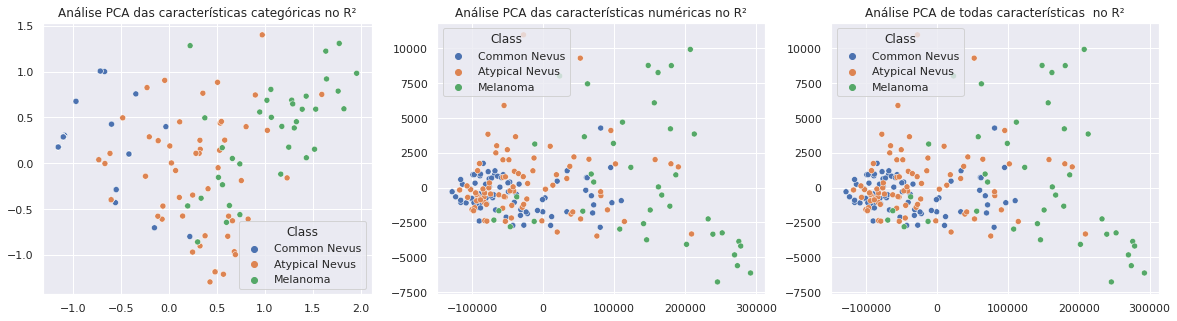

In [29]:
categorical_data = full_data[doc_list]
numerical_data = full_data[img_list]
R2_categorical_data = PCA_apply(categorical_data,2) 
R2_numerical_data = PCA_apply(numerical_data, 2)
R2_full_data = PCA_apply(X,2)

# Configuração do Plot
plt.figure(figsize=(20,5))
sns.set(font_scale=1.0)

plt.subplot(1,3,1)
sns.scatterplot(R2_categorical_data[0],R2_categorical_data[1], hue = y['Class'])
plt.title('Análise PCA das características categóricas no R²')
plt.ylabel('')
plt.xlabel('')

plt.subplot(1,3,2)
sns.scatterplot(R2_numerical_data[0],R2_numerical_data[1], hue = y['Class'])
plt.title('Análise PCA das características numéricas no R²')
plt.ylabel('')
plt.xlabel('')

plt.subplot(1,3,3)
sns.scatterplot(R2_full_data[0],R2_full_data[1], hue = y['Class'])
plt.title('Análise PCA de todas características  no R²')
plt.ylabel('')
plt.xlabel('')

# Teste presença de Câncer de Pele - Problema Binário [0] ou [1]

---



## Treinamento do modelo de Árvore de Decisões - Teste 1 - Normal

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


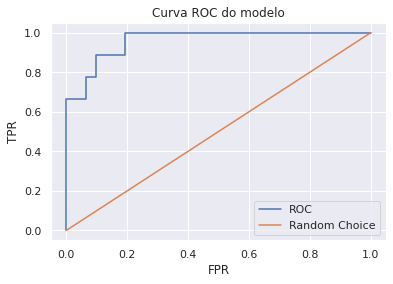

In [30]:
MLP_class = MLPClassifier(hidden_layer_sizes=(100,100))
print(MLP_class)

# Treinando nosso modelo logístico
MLP_class.fit(doc_data_X_train,y_train_cancer)

# Testeando a predição
y_train_pred = MLP_class.predict(doc_data_X_train)
amostra1_1 = MLP_class.predict(doc_data_X_test)
y_score1_1 = MLP_class.predict_proba(doc_data_X_test)
y_score1_1 = y_score1_1[:,1]
ROC_Plot(y_test_cancer, y_score1_1)

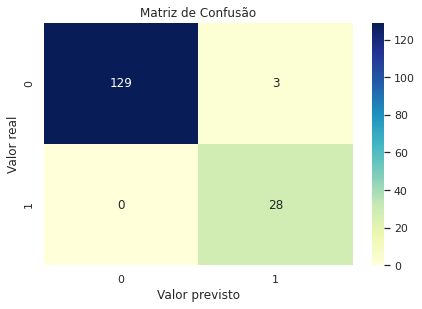

In [31]:
plot_results(y_train_pred, y_train_cancer)

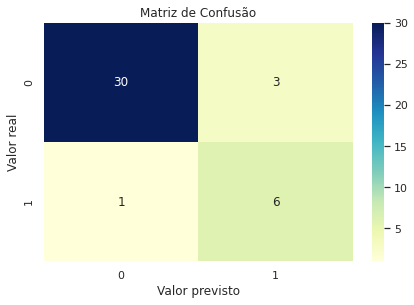

In [32]:
plot_results(amostra1_1, y_test_cancer)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


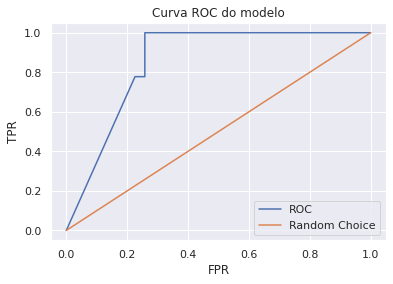

In [33]:
print(MLP_class)

# Treinando nosso modelo logístico
MLP_class.fit(img_data_X_train,y_train_cancer)

# Testeando a predição
y_train_pred = MLP_class.predict(img_data_X_train)
amostra2_1 = MLP_class.predict(img_data_X_test)
y_score2_1 = MLP_class.predict_proba(img_data_X_test)
y_score2_1 = y_score2_1[:,1]
ROC_Plot(y_test_cancer, y_score2_1)

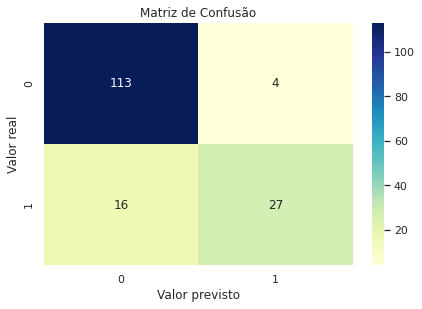

In [34]:
plot_results(y_train_pred, y_train_cancer)

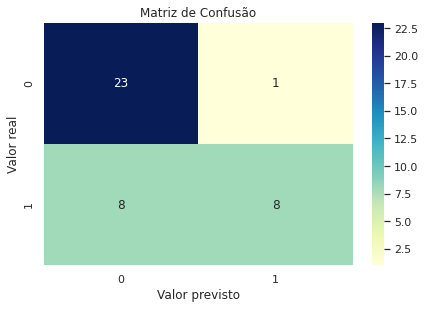

In [35]:
plot_results(amostra2_1, y_test_cancer)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


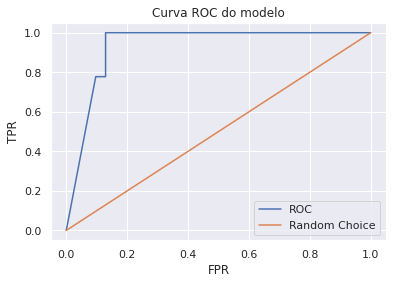

In [36]:
print(MLP_class)

# Treinando nosso modelo logístico
MLP_class.fit(full_data_X_train,y_train_cancer)

# Testeando a predição
y_train_pred = MLP_class.predict(full_data_X_train)
amostra3_1 = MLP_class.predict(full_data_X_test)
y_score3_1 = MLP_class.predict_proba(full_data_X_test)
y_score3_1 = y_score3_1[:,1]
ROC_Plot(y_test_cancer, y_score3_1)

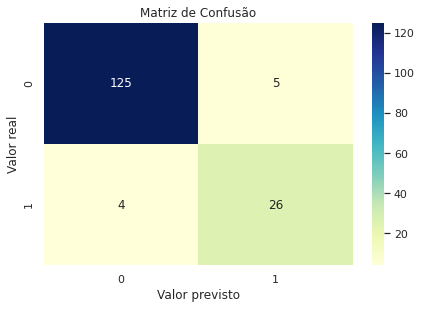

In [37]:
plot_results(y_train_pred, y_train_cancer)

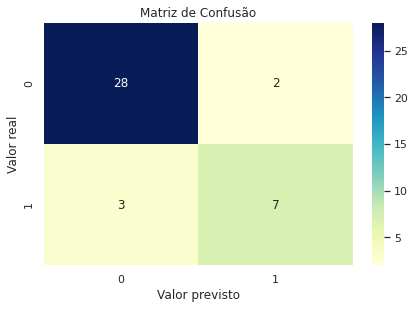

In [38]:
plot_results(amostra3_1, y_test_cancer)

##  Treinamento do modelo de Árvore de Decisões - Teste 2 - Melhores parâmetros 

In [39]:
param_all = {'probability':[True],
         'kernel':['linear'],
         'tol':[0.000001],'degree':[2,3,4,5],
             'probability':[True],
             'C':[1,10,100,250,500],
             'gamma':['scale', 'auto'],
             'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
             'coef0':[0.0, 0.5, 0.8, 1.0 ,1.5, 2.0, 2.5],
             'tol':[0.001, 0.0001]
             }

param = {'hidden_layer_sizes':[(50,50),(100,100),(150,100),(200,100),(150,150)],
         'activation': ['identity', 'logistic', 'tanh', 'relu'],
         'learning_rate':['constant'],
         'max_iter':[10000],
         'tol':[0.0001],
         #'solver':['lbfgs', 'sgd', 'adam'],
         'alpha':[0.0001]

        }

MLmodel = MLPClassifier()

In [40]:
MLP_class = best_model(MLmodel, doc_data_X_train,y_train_cancer)
print(MLP_class)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(200, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


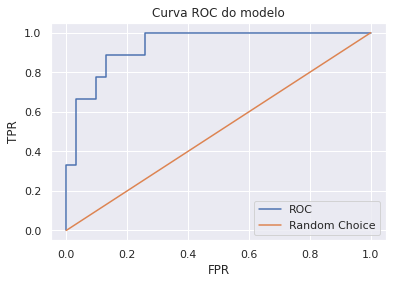

In [41]:
MLP_class.fit(doc_data_X_train,y_train_cancer)

y_train_pred = MLP_class.predict(doc_data_X_train)
amostra1_2 = MLP_class.predict(doc_data_X_test)
y_score1_2 = MLP_class.predict_proba(doc_data_X_test)
y_score1_2 = y_score1_2[:,1]
ROC_Plot(y_test_cancer, y_score1_2)

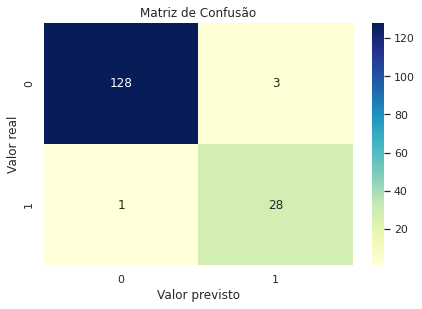

In [42]:
plot_results(y_train_pred,y_train_cancer)

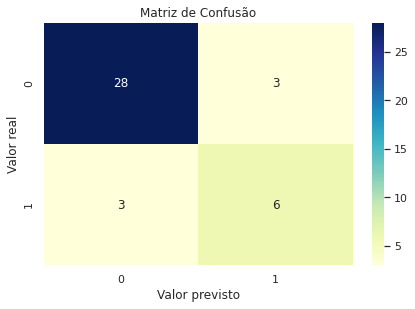

In [43]:
plot_results(amostra1_2,y_test_cancer)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(150, 150), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


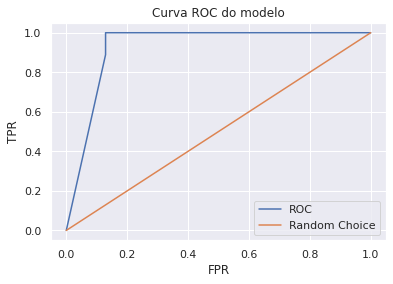

In [44]:
MLP_class = best_model(MLmodel, img_data_X_train,y_train_cancer)
print(MLP_class)

# Treinando nosso modelo logístico
MLP_class.fit(img_data_X_train,y_train_cancer)

# Testeando a predição
y_train_pred = MLP_class.predict(img_data_X_train)
amostra2_2 = MLP_class.predict(img_data_X_test)
y_score2_2 = MLP_class.predict_proba(img_data_X_test)
y_score2_2 = y_score2_2[:,1]
ROC_Plot(y_test_cancer, y_score2_2)

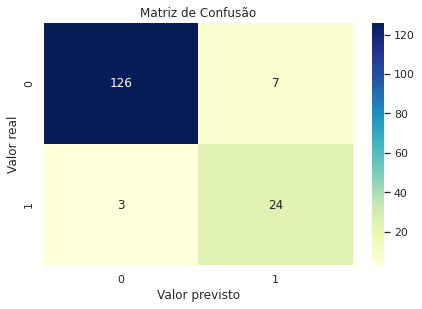

In [45]:
plot_results(y_train_pred,y_train_cancer)

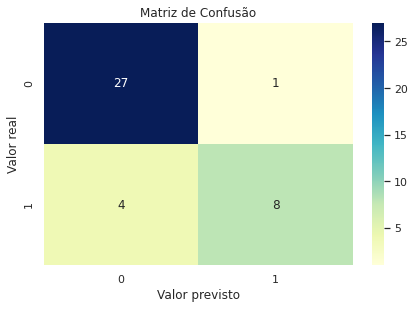

In [46]:
plot_results(amostra2_2,y_test_cancer)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(150, 150), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


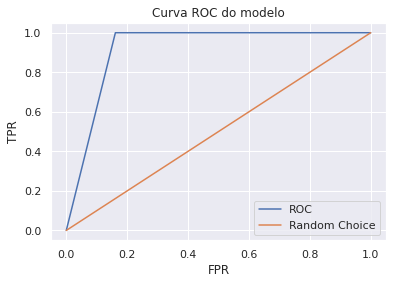

In [47]:
MLP_class = best_model(MLmodel, full_data_X_train,y_train_cancer)
print(MLP_class)

# Treinando nosso modelo logístico
MLP_class.fit(full_data_X_train,y_train_cancer)

# Testeando a predição
y_train_pred = MLP_class.predict(full_data_X_train)
amostra3_2 = MLP_class.predict(full_data_X_test)
y_score3_2 = MLP_class.predict_proba(full_data_X_test)
y_score3_2 = y_score3_2[:,1]
ROC_Plot(y_test_cancer, y_score3_2)

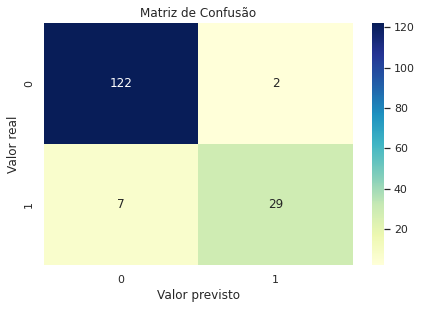

In [48]:
plot_results(y_train_pred,y_train_cancer)

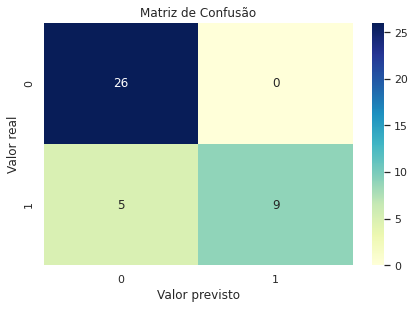

In [49]:
plot_results(amostra3_2,y_test_cancer)

##  Treinamento do modelo de Árvore de Decisões - Teste 3 - Melhores parâmetros + Normalização do Dataset

In [50]:
MLP_class = best_model(MLmodel, doc_data_X_train_normalized,y_train_cancer)
print(MLP_class)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(150, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


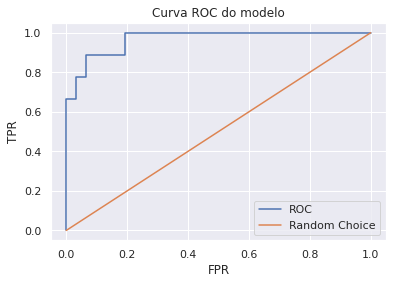

In [51]:
# Treinando nosso modelo logístico
MLP_class.fit(doc_data_X_train_normalized,y_train_cancer)

# Testeando a predição
y_train_pred = MLP_class.predict(doc_data_X_train_normalized)
amostra1_3 = MLP_class.predict(doc_data_X_test_normalized)
y_score1_3 = MLP_class.predict_proba(doc_data_X_test_normalized)
y_score1_3 = y_score1_3[:,1]
ROC_Plot(y_test_cancer, y_score1_3)

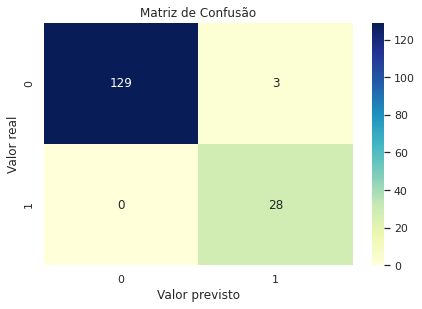

In [52]:
plot_results(y_train_pred,y_train_cancer)

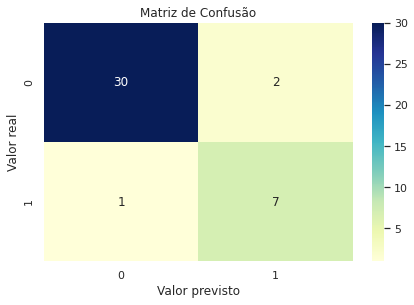

In [53]:
plot_results(amostra1_3,y_test_cancer)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


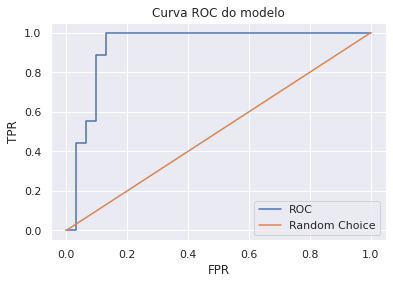

In [54]:
MLP_class = best_model(MLmodel, img_data_X_train_normalized,y_train_cancer)
print(MLP_class)

# Treinando nosso modelo logístico
MLP_class.fit(img_data_X_train_normalized,y_train_cancer)

# Testeando a predição
y_train_pred = MLP_class.predict(img_data_X_train_normalized)
amostra2_3 = MLP_class.predict(img_data_X_test_normalized)
y_score2_3 = MLP_class.predict_proba(img_data_X_test_normalized)
y_score2_3 = y_score2_3[:,1]
ROC_Plot(y_test_cancer, y_score2_3)

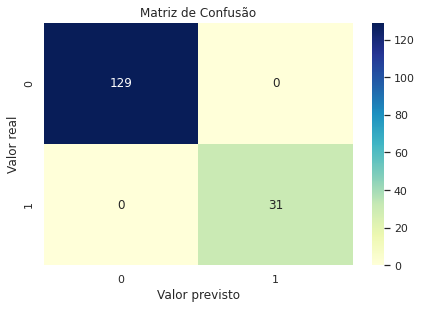

In [55]:
plot_results(y_train_pred,y_train_cancer)

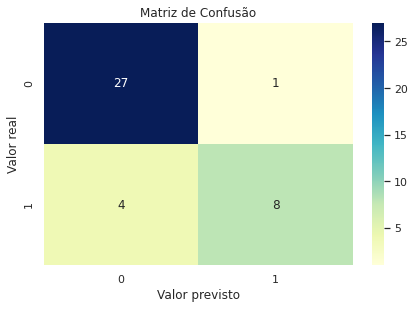

In [56]:
plot_results(amostra2_3,y_test_cancer)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


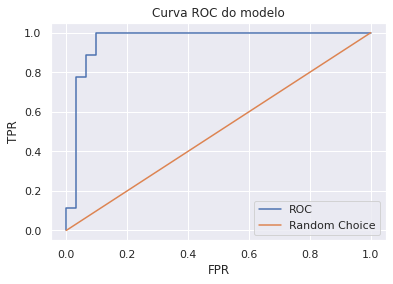

In [57]:
MLP_class = best_model(MLmodel, full_data_X_train_normalized,y_train_cancer)
print(MLP_class)

# Treinando nosso modelo logístico
MLP_class.fit(full_data_X_train_normalized,y_train_cancer)

# Testeando a predição
y_train_pred = MLP_class.predict(full_data_X_train_normalized)
amostra3_3 = MLP_class.predict(full_data_X_test_normalized)
y_score3_3 = MLP_class.predict_proba(full_data_X_test_normalized)
y_score3_3 = y_score3_3[:,1]
ROC_Plot(y_test_cancer, y_score3_3)

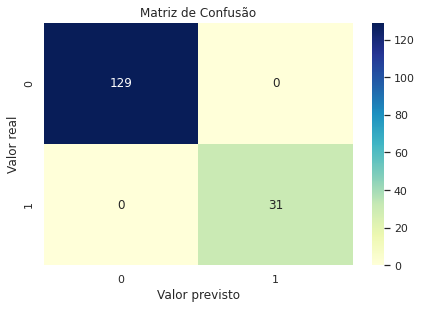

In [58]:
plot_results(y_train_pred,y_train_cancer)

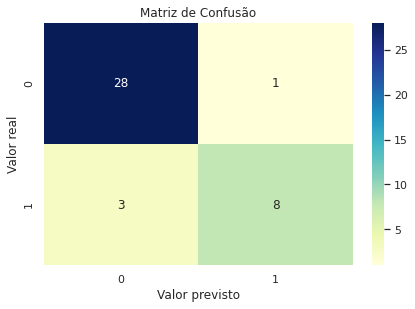

In [59]:
plot_results(amostra3_3,y_test_cancer)

## Treinamento do modelo de Árvore de Decisões - Teste 4 - Melhores parâmetros + SMOTE

In [60]:
MLP_class = best_model(MLmodel, doc_data_X_train_smote, doc_data_y_train_smote)
print(MLP_class)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


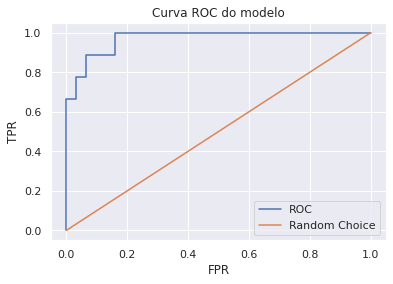

In [61]:
MLP_class.fit(doc_data_X_train_smote, doc_data_y_train_smote)

y_train_pred = MLP_class.predict(doc_data_X_train_smote)
amostra1_4 = MLP_class.predict(doc_data_X_test)
y_score1_4 = MLP_class.predict_proba(doc_data_X_test)
y_score1_4 = y_score1_4[:,1]
ROC_Plot(y_test_cancer, y_score1_4)


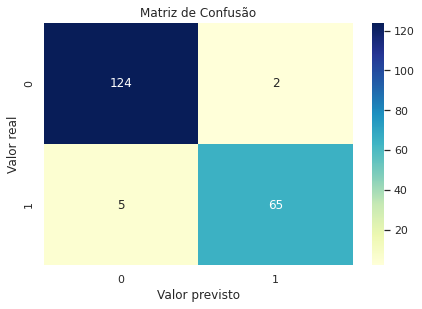

In [62]:
plot_results(y_train_pred,doc_data_y_train_smote)

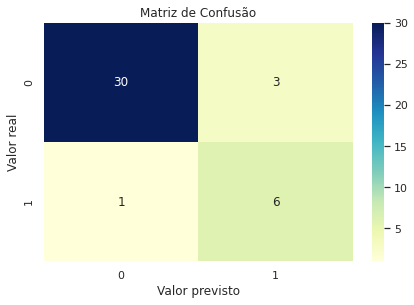

In [63]:
plot_results(amostra1_4,y_test_cancer)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


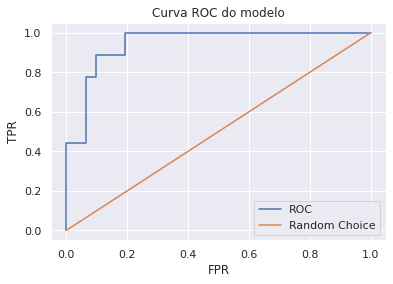

In [64]:
MLP_class = best_model(MLmodel, img_data_X_train_smote, img_data_y_train_smote)
print(MLP_class)

# Treinando nosso modelo logístico
MLP_class.fit(img_data_X_train_smote, img_data_y_train_smote)

# Testeando a predição
y_train_pred = MLP_class.predict(img_data_X_train_smote)
amostra2_4 = MLP_class.predict(img_data_X_test)
y_score2_4 = MLP_class.predict_proba(img_data_X_test)
y_score2_4 = y_score2_4[:,1]
ROC_Plot(y_test_cancer, y_score2_4)



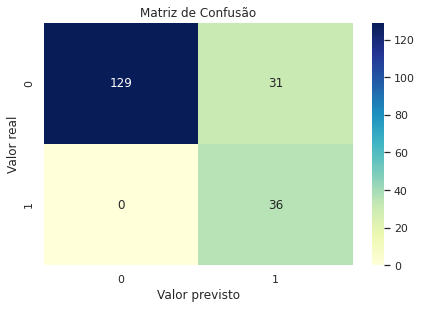

In [65]:
plot_results(y_train_pred,img_data_y_train_smote)

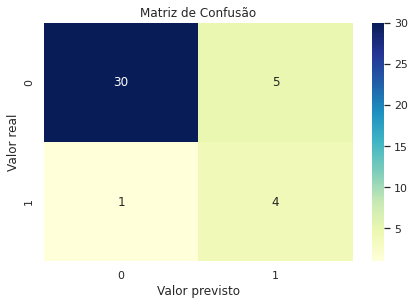

In [66]:
plot_results(amostra2_4,y_test_cancer)

MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(150, 150), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


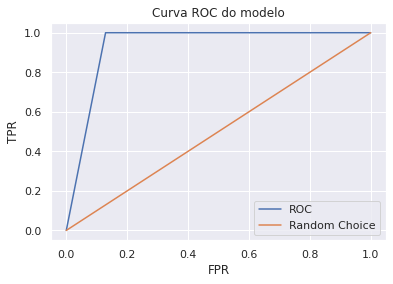

In [67]:
MLP_class = best_model(MLmodel, full_data_X_train_smote, full_data_y_train_smote)
print(MLP_class)

# Treinando nosso modelo logístico
MLP_class.fit(full_data_X_train_smote, full_data_y_train_smote)

# Testeando a predição
y_train_pred = MLP_class.predict(full_data_X_train_smote)
amostra3_4 = MLP_class.predict(full_data_X_test)
y_score3_4 = MLP_class.predict_proba(full_data_X_test)
y_score3_4 = y_score3_4[:,1]
ROC_Plot(y_test_cancer, y_score3_4)


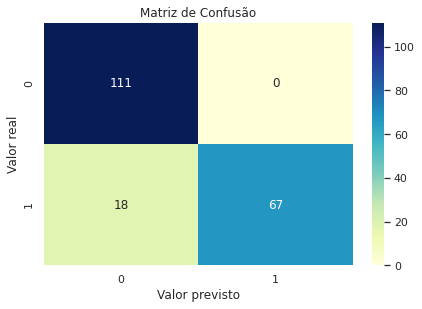

In [68]:
plot_results(y_train_pred,full_data_y_train_smote)

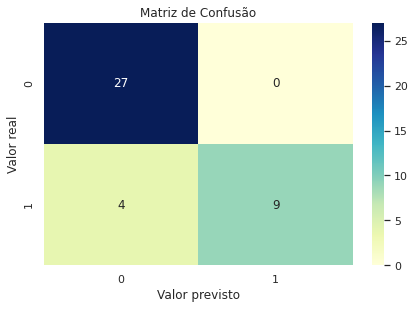

In [69]:
plot_results(amostra3_4,y_test_cancer)

## Treinamento do modelo de Árvore de Decisões - Teste 5 - Melhores parâmetros + SMOTE + Normalização

In [70]:
MLP_class = best_model(MLmodel, doc_data_X_train_normalized_smote, doc_data_y_train_normalized_smote)
print(MLP_class)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


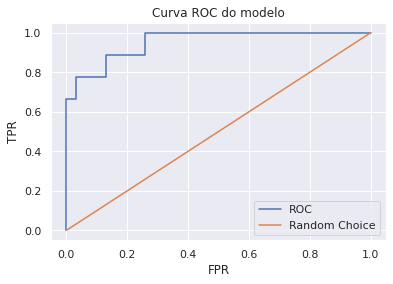

In [71]:

MLP_class.fit(doc_data_X_train_normalized_smote, doc_data_y_train_normalized_smote)

y_train_pred = MLP_class.predict(doc_data_X_train_normalized_smote)
amostra1_5 = MLP_class.predict(doc_data_X_test_normalized)
y_score1_5 = MLP_class.predict_proba(doc_data_X_test_normalized)
y_score1_5 = y_score1_5[:,1]
ROC_Plot(y_test_cancer, y_score1_5)


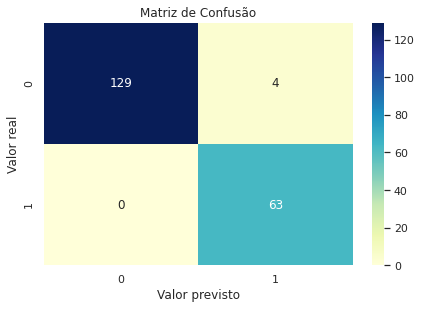

In [72]:
plot_results(y_train_pred,doc_data_y_train_normalized_smote)

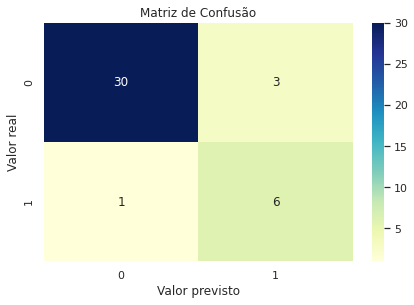

In [73]:
plot_results(amostra1_5,y_test_cancer)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(150, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


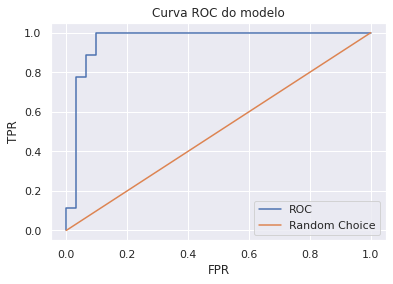

In [74]:
MLP_class = best_model(MLmodel, img_data_X_train_normalized_smote, img_data_y_train_normalized_smote)
print(MLP_class)

# Treinando nosso modelo logístico
MLP_class.fit(img_data_X_train_normalized_smote, img_data_y_train_normalized_smote)

# Testeando a predição
y_train_pred = MLP_class.predict(img_data_X_train_normalized_smote)
amostra2_5 = MLP_class.predict(img_data_X_test_normalized)
y_score2_5 = MLP_class.predict_proba(img_data_X_test_normalized)
y_score2_5 = y_score2_5[:,1]
ROC_Plot(y_test_cancer, y_score2_5)

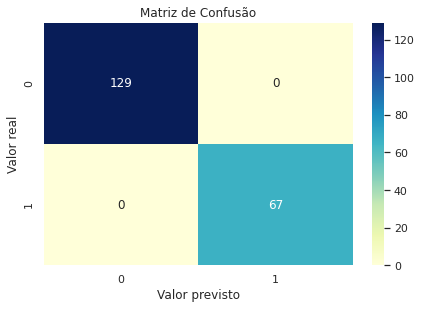

In [75]:
plot_results(y_train_pred,img_data_y_train_normalized_smote)

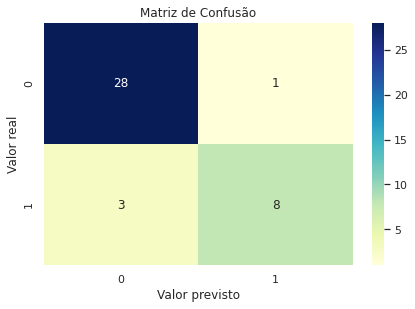

In [76]:
plot_results(amostra2_5,y_test_cancer)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(150, 150), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


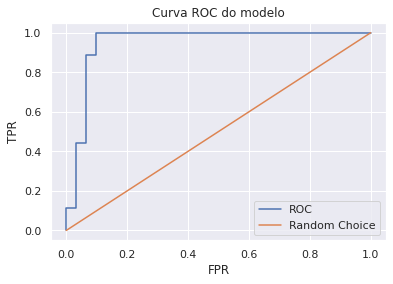

In [77]:
MLP_class = best_model(MLmodel, full_data_X_train_normalized_smote, full_data_y_train_normalized_smote)
print(MLP_class)

# Treinando nosso modelo logístico
MLP_class.fit(full_data_X_train_normalized_smote, full_data_y_train_normalized_smote)

# Testeando a predição
y_train_pred = MLP_class.predict(full_data_X_train_normalized_smote)
amostra3_5 = MLP_class.predict(full_data_X_test_normalized)
y_score3_5 = MLP_class.predict_proba(full_data_X_test_normalized)
y_score3_5 = y_score3_5[:,1]
ROC_Plot(y_test_cancer, y_score3_5)

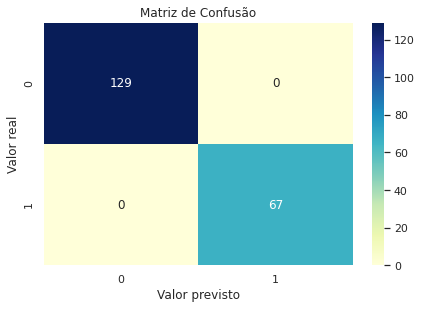

In [78]:
plot_results(y_train_pred,full_data_y_train_normalized_smote)

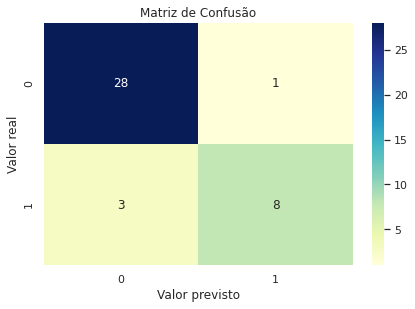

In [79]:
plot_results(amostra3_5,y_test_cancer)

# Teste classificação do tipo de Imagem - 1 -> CN // 2 -> AN // 0 -> MELANOMA

---

### Treinamento do modelo de Árvore de Decisões - Teste 1 - Normal

In [80]:
y_test_class = y_test_class['Class'].map(all_class_dic)
y_train_all_class_matriz = y_train_all_class['Common_Nevus'] + 2*y_train_all_class['Atypical_Nevus']
y_train_all_class = y_train_all_class_matriz

In [81]:
print(MLP_class)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(150, 150), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [82]:
MLP_class.fit(doc_data_X_train,y_train_all_class)

# Testeando a predição
y_train_pred = MLP_class.predict(doc_data_X_train)
Geral1_1 = MLP_class.predict(doc_data_X_test)
y_score_Geral1_1 = MLP_class.predict_proba(doc_data_X_test)

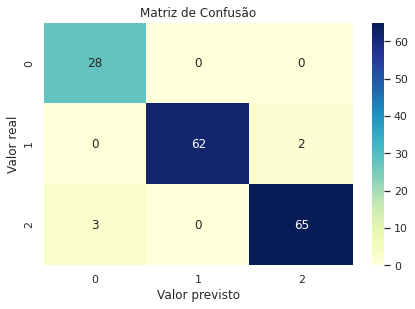

In [83]:
plot_results(y_train_pred, y_train_all_class_matriz)

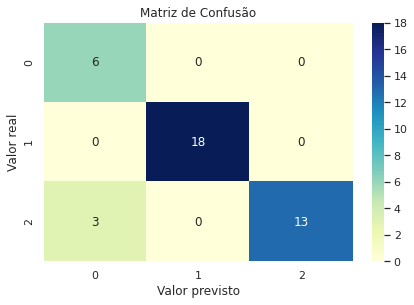

In [84]:
plot_results(Geral1_1, y_test_class)

In [85]:
MLP_class

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(150, 150), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [86]:
MLP_class.fit(img_data_X_train,y_train_all_class)

# Testeando a predição
y_train_pred = MLP_class.predict(img_data_X_train)
Geral2_1 = MLP_class.predict(img_data_X_test)
y_score_Geral2_1 = MLP_class.predict_proba(img_data_X_test)

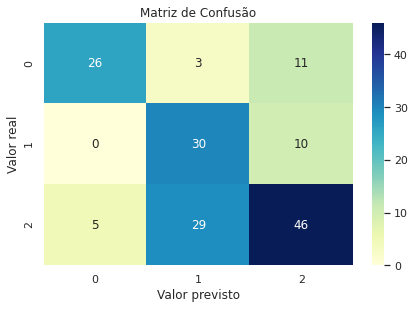

In [87]:
plot_results(y_train_pred, y_train_all_class_matriz)

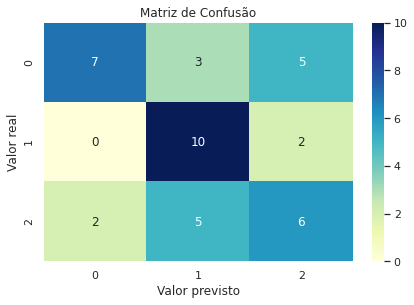

In [88]:
plot_results(Geral2_1, y_test_class)

In [89]:
MLP_class

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(150, 150), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [90]:

MLP_class.fit(full_data_X_train,y_train_all_class)

# Testeando a predição
y_train_pred = MLP_class.predict(full_data_X_train)
Geral3_1 = MLP_class.predict(full_data_X_test)
y_score_Geral3_1 = MLP_class.predict_proba(full_data_X_test)

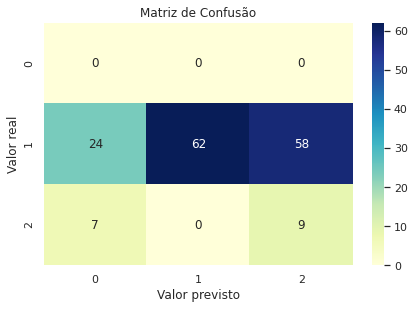

In [91]:
plot_results(y_train_pred, y_train_all_class_matriz)

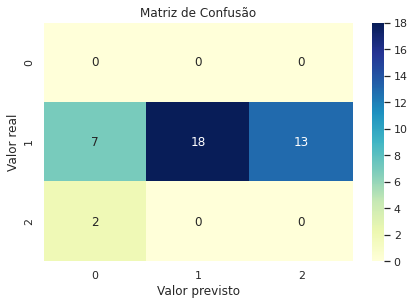

In [92]:
plot_results(Geral3_1, y_test_class)

## Treinamento do modelo de Árvore de Decisões - Teste 2 - Melhores parâmetros

In [93]:
MLP_class = best_model(MLmodel, doc_data_X_train,y_train_all_class)
print(MLP_class)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(150, 150), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [94]:
MLP_class.fit(doc_data_X_train,y_train_all_class)

# Testeando a predição
y_train_pred = MLP_class.predict(doc_data_X_train)
Geral1_2 = MLP_class.predict(doc_data_X_test)
y_score_Geral1_2 = MLP_class.predict_proba(doc_data_X_test)

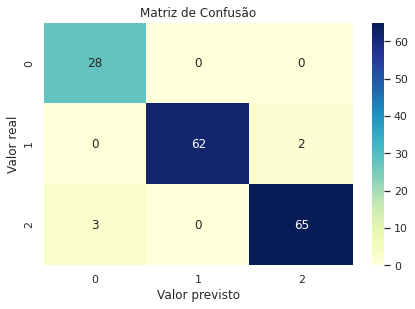

In [95]:
plot_results(y_train_pred, y_train_all_class_matriz)

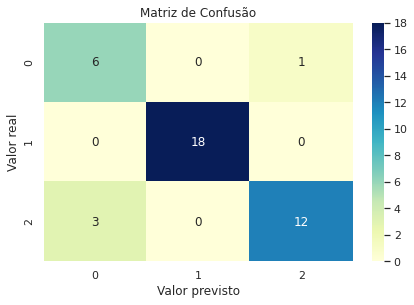

In [96]:
plot_results(Geral1_2, y_test_class)

In [97]:
MLP_class = best_model(MLmodel, img_data_X_train,y_train_all_class)
print(MLP_class)

MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(150, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [98]:
# Testeando a predição
y_train_pred = MLP_class.predict(img_data_X_train)
Geral2_2 = MLP_class.predict(img_data_X_test)
y_score_Geral2_2 = MLP_class.predict_proba(img_data_X_test)

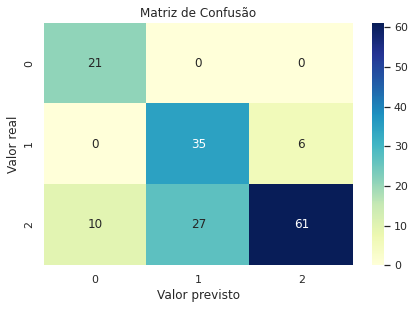

In [99]:
plot_results(y_train_pred, y_train_all_class_matriz)

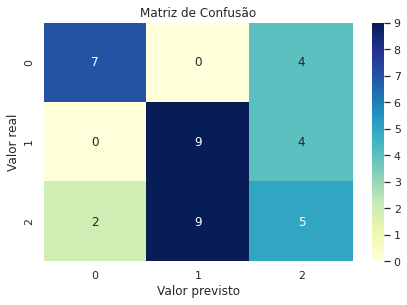

In [100]:
plot_results(Geral2_2, y_test_class)

In [101]:
MLP_class = best_model(MLmodel, full_data_X_train,y_train_all_class)
print(MLP_class)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [102]:
MLP_class.fit(full_data_X_train,y_train_all_class)

# Testeando a predição
y_train_pred = MLP_class.predict(full_data_X_train)
Geral3_2 = MLP_class.predict(full_data_X_test)
y_score_Geral3_2 = MLP_class.predict_proba(full_data_X_test)

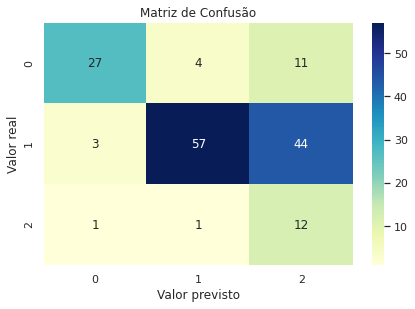

In [103]:
plot_results(y_train_pred, y_train_all_class_matriz)

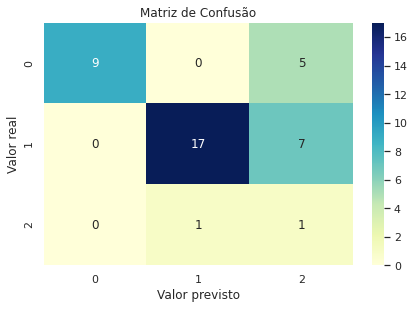

In [104]:
plot_results(Geral3_2, y_test_class)

## Treinamento do modelo de Árvores de Decisões - Teste 3 - Melhores Parâmetros + Normalização

In [105]:
MLP_class = best_model(MLmodel, doc_data_X_train_normalized,y_train_all_class)
print(MLP_class)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [106]:
# Treinando nosso modelo logístico
MLP_class.fit(doc_data_X_train_normalized,y_train_all_class)

# Testeando a predição
y_train_pred = MLP_class.predict(doc_data_X_train_normalized)
Geral1_3 = MLP_class.predict(doc_data_X_test_normalized)
y_score_Geral1_3 = MLP_class.predict_proba(doc_data_X_test_normalized)

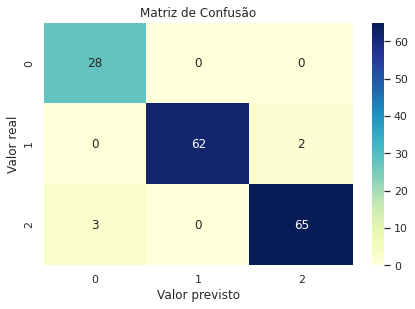

In [107]:
plot_results(y_train_pred,y_train_all_class_matriz)

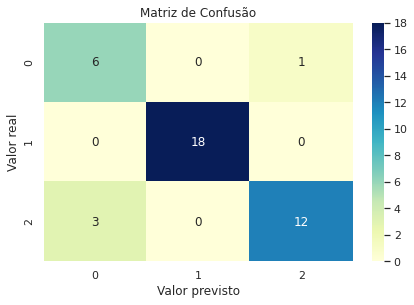

In [108]:
plot_results(Geral1_3, y_test_class)

In [109]:
MLP_class = best_model(MLmodel, img_data_X_train_normalized,y_train_all_class)
print(MLP_class)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(150, 150), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [110]:
# Treinando nosso modelo logístico
MLP_class.fit(img_data_X_train_normalized,y_train_all_class)

# Testeando a predição
y_train_pred = MLP_class.predict(img_data_X_train_normalized)
Geral2_3 = MLP_class.predict(img_data_X_test_normalized)
y_score_Geral2_3 = MLP_class.predict_proba(img_data_X_test_normalized)

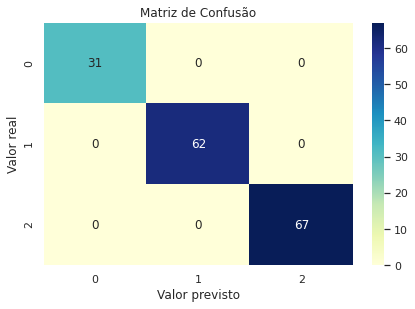

In [111]:
plot_results(y_train_pred,y_train_all_class_matriz)

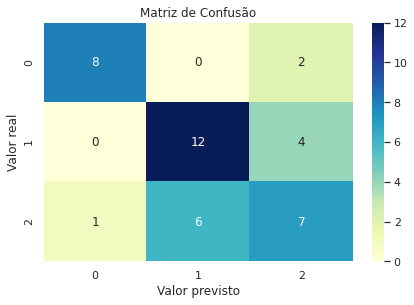

In [112]:
plot_results(Geral2_3, y_test_class)

In [113]:
MLP_class = best_model(MLmodel, img_data_X_train_normalized,y_train_all_class)
print(MLP_class)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(150, 150), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [114]:
# Treinando nosso modelo logístico
MLP_class.fit(full_data_X_train_normalized,y_train_all_class)

# Testeando a predição
y_train_pred = MLP_class.predict(full_data_X_train_normalized)
Geral3_3 = MLP_class.predict(full_data_X_test_normalized)
y_score_Geral3_3 = MLP_class.predict_proba(full_data_X_test_normalized)

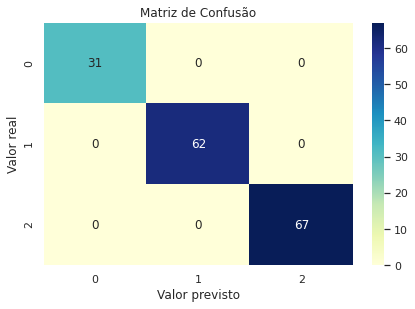

In [115]:
plot_results(y_train_pred,y_train_all_class_matriz)

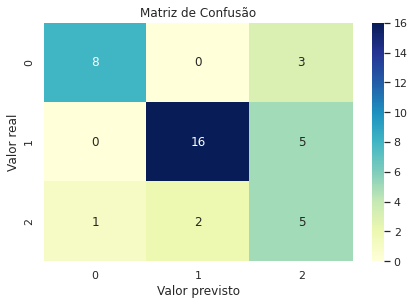

In [116]:
plot_results(Geral3_3, y_test_class)

## Treinamento do modelo de Árvores de Decisões - Teste 4 - Melhores parâmetros + SMOTE

In [117]:
MLP_class = best_model(MLmodel, doc_data_X_train_smote, doc_data_y_train_smote_2)
print(MLP_class)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(150, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [118]:
MLP_class.fit(doc_data_X_train_smote, doc_data_y_train_smote_2)

y_train_pred = MLP_class.predict(doc_data_X_train_smote)
Geral1_4 = MLP_class.predict(doc_data_X_test)
y_score_Geral1_4 = MLP_class.predict_proba(doc_data_X_test)

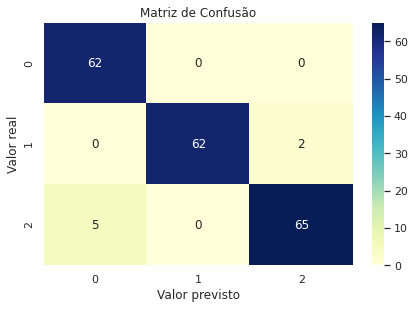

In [119]:
plot_results(y_train_pred,doc_data_y_train_smote_2)

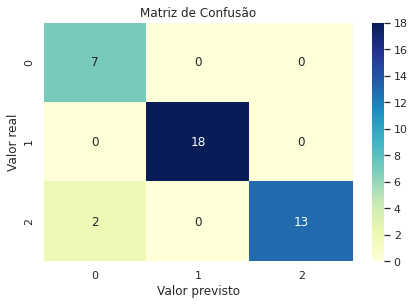

In [120]:
plot_results(Geral1_4,y_test_class)

In [121]:
MLP_class = best_model(MLmodel, img_data_X_train_smote, img_data_y_train_smote_2)
print(MLP_class)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [122]:
MLP_class.fit(img_data_X_train_smote, img_data_y_train_smote_2)

y_train_pred = MLP_class.predict(img_data_X_train_smote)
Geral2_4 = MLP_class.predict(img_data_X_test)
y_score_Geral2_4 = MLP_class.predict_proba(img_data_X_test)

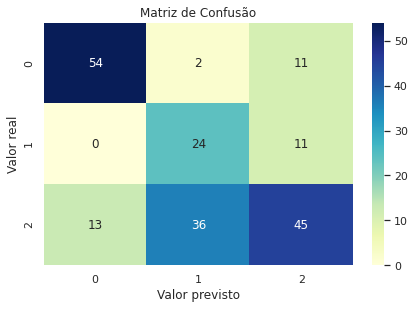

In [123]:
plot_results(y_train_pred,doc_data_y_train_smote_2)

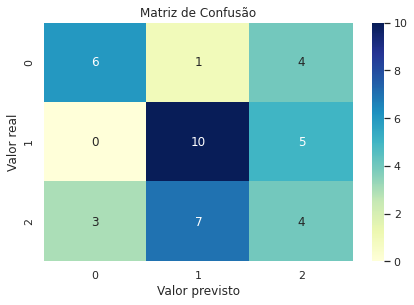

In [124]:
plot_results(Geral2_4,y_test_class)

In [125]:
MLP_class = best_model(MLmodel, full_data_X_train_smote, full_data_y_train_smote_2)
print(MLP_class)


MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(150, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [126]:
MLP_class.fit(full_data_X_train_smote, full_data_y_train_smote_2)

y_train_pred = MLP_class.predict(full_data_X_train_smote)
Geral3_4 = MLP_class.predict(full_data_X_test)
y_score_Geral3_4 = MLP_class.predict_proba(full_data_X_test)

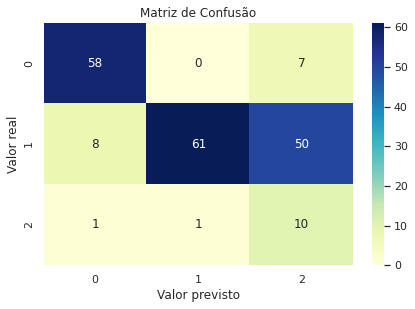

In [127]:
plot_results(y_train_pred,doc_data_y_train_smote_2)

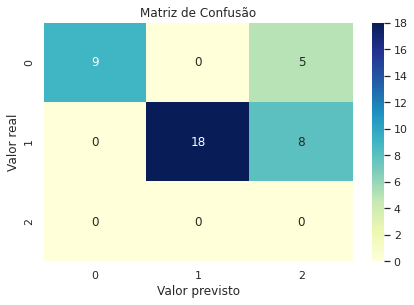

In [128]:
plot_results(Geral3_4,y_test_class)

## Treinamento do modelo de Árvores de Decisões - Teste 5 - Melhores parâmetros + SMOTE + Normalização

In [129]:
MLP_class = best_model(MLmodel, doc_data_X_train_normalized_smote, doc_data_y_train_normalized_smote_2)
print(MLP_class)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(150, 150), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [130]:
MLP_class.fit(doc_data_X_train_normalized_smote, doc_data_y_train_normalized_smote_2)

y_train_pred = MLP_class.predict(doc_data_X_train_normalized_smote)
Geral1_5 = MLP_class.predict(doc_data_X_test_normalized)
y_score_Geral1_5 = MLP_class.predict_proba(doc_data_X_test_normalized)

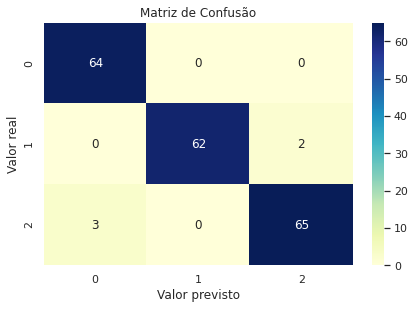

In [131]:
plot_results(y_train_pred,doc_data_y_train_normalized_smote_2)

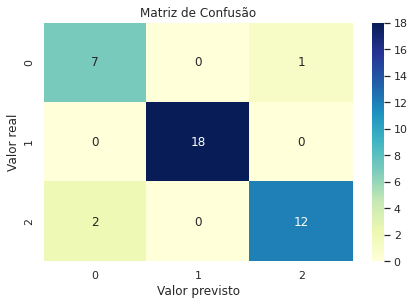

In [132]:
plot_results(Geral1_5,y_test_class)

In [133]:
MLP_class = best_model(MLmodel, img_data_X_train_normalized_smote, img_data_y_train_normalized_smote_2)
print(MLP_class)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(150, 150), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [134]:
MLP_class.fit(img_data_X_train_normalized_smote, img_data_y_train_normalized_smote_2)

y_train_pred = MLP_class.predict(img_data_X_train_normalized_smote)
Geral2_5 = MLP_class.predict(img_data_X_test_normalized)
y_score_Geral2_5 = MLP_class.predict_proba(img_data_X_test_normalized)

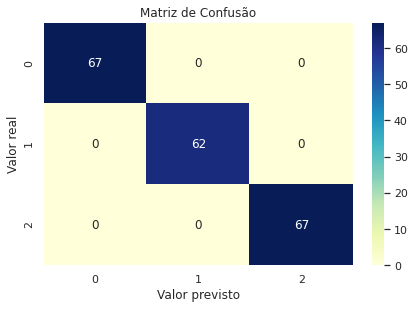

In [135]:
plot_results(y_train_pred,img_data_y_train_normalized_smote_2)

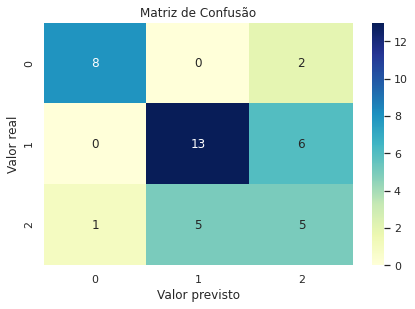

In [136]:
plot_results(Geral2_5,y_test_class)

In [137]:
MLP_class = best_model(MLmodel, full_data_X_train_normalized_smote, full_data_y_train_normalized_smote_2)
print(MLP_class)


MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(150, 150), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [138]:
MLP_class.fit(full_data_X_train_normalized_smote, full_data_y_train_normalized_smote_2)

y_train_pred = MLP_class.predict(full_data_X_train_normalized_smote)
Geral3_5 = MLP_class.predict(full_data_X_test_normalized)
y_score_Geral3_5 = MLP_class.predict_proba(full_data_X_test_normalized)

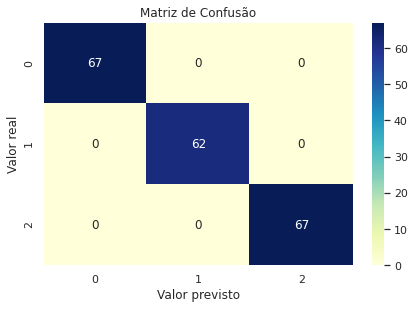

In [139]:
plot_results(y_train_pred,full_data_y_train_normalized_smote_2)

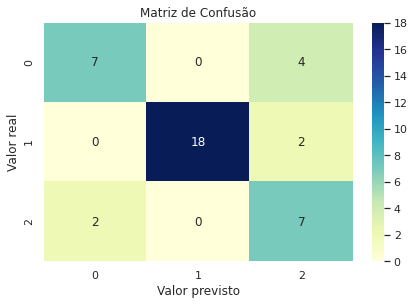

In [140]:
plot_results(Geral3_5,y_test_class)

# Avaliação de desempenho de cada Teste

In [141]:
Results_bin = [bin_metrics(y_test_cancer,amostra1_1, y_score1_1),
               bin_metrics(y_test_cancer,amostra1_2, y_score1_2),
               bin_metrics(y_test_cancer,amostra1_3, y_score1_3),
               bin_metrics(y_test_cancer,amostra1_4, y_score1_4),
               bin_metrics(y_test_cancer,amostra1_5, y_score1_5),
               bin_metrics(y_test_cancer,amostra2_1, y_score2_1),
               bin_metrics(y_test_cancer,amostra2_2, y_score2_2),
               bin_metrics(y_test_cancer,amostra2_3, y_score2_3),
               bin_metrics(y_test_cancer,amostra2_4, y_score2_4),
               bin_metrics(y_test_cancer,amostra2_5, y_score2_5),
               bin_metrics(y_test_cancer,amostra3_1, y_score3_1),
               bin_metrics(y_test_cancer,amostra3_2, y_score3_2),
               bin_metrics(y_test_cancer,amostra3_3, y_score3_3), 
               bin_metrics(y_test_cancer,amostra3_4, y_score3_4), 
               bin_metrics(y_test_cancer,amostra3_5, y_score3_5)]
              
Name = np.asarray(['Amostra 1 - T1','Amostra 1 - T2','Amostra 1 - T3','Amostra 1 - T4','Amostra 1 - T5', 
        'Amostra 2 - T1','Amostra 2 - T2','Amostra 2 - T3','Amostra 2 - T4','Amostra 2 - T5', 
        'Amostra 3 - T1','Amostra 3 - T2','Amostra 3 - T3','Amostra 3 - T4','Amostra 3 - T5'])

Name = Name.reshape(15,1)
Name = pd.DataFrame(Name)

dataframe = pd.DataFrame(Results_bin, columns=['Accur','Precision','Recall','F1', 'Fbeta', 'Balanced Score', 'ROC_Score','MMC','FM'])
Final_Result_bin = pd.concat([Name,dataframe],axis=1)
Final_Result_bin.to_csv("Resultados_MLP2Layer_Bin.csv")
Final_Result_bin


,0,Accur,Precision,Recall,F1,Fbeta,Balanced Score,ROC_Score,MMC,FM
0,Amostra 1 - T1,0.900,0.857143,0.666667,0.750000,0.810811,0.817204,0.960573,0.697213,0.862863
1,Amostra 1 - T2,0.850,0.666667,0.666667,0.666667,0.666667,0.784946,0.935484,0.569892,0.795699
2,Amostra 1 - T3,0.925,0.875000,0.777778,0.823529,0.853659,0.872760,0.967742,0.778290,0.898053
3,Amostra 1 - T4,0.900,0.857143,0.666667,0.750000,0.810811,0.817204,0.971326,0.697213,0.866447
4,Amostra 1 - T5,0.900,0.857143,0.666667,0.750000,0.810811,0.817204,0.953405,0.697213,0.860473
5,Amostra 2 - T1,0.775,0.500000,0.888889,0.640000,0.547945,0.815412,0.854839,0.537706,0.739399
6,Amostra 2 - T2,0.875,0.666667,0.888889,0.761905,0.701754,0.879928,0.928315,0.692411,0.836666
7,Amostra 2 - T3,0.875,0.666667,0.888889,0.761905,0.701754,0.879928,0.931900,0.692411,0.837861
8,Amostra 2 - T4,0.850,0.800000,0.444444,0.571429,0.689655,0.706093,0.946237,0.520447,0.780662
9,Amostra 2 - T5,0.900,0.727273,0.888889,0.800000,0.754717,0.896057,0.960573,0.740790,0.870449


In [142]:
Results_all = [multi_metrics(y_test_class,Geral1_1, y_score_Geral1_1),
               multi_metrics(y_test_class,Geral1_2, y_score_Geral1_2),
               multi_metrics(y_test_class,Geral1_3, y_score_Geral1_3),
               multi_metrics(y_test_class,Geral1_4, y_score_Geral1_4),
               multi_metrics(y_test_class,Geral1_5, y_score_Geral1_5),
               multi_metrics(y_test_class,Geral2_1, y_score_Geral2_1),
               multi_metrics(y_test_class,Geral2_2, y_score_Geral2_2),
               multi_metrics(y_test_class,Geral2_3, y_score_Geral2_3),
               multi_metrics(y_test_class,Geral2_4, y_score_Geral2_4),
               multi_metrics(y_test_class,Geral2_5, y_score_Geral2_5),
               multi_metrics(y_test_class,Geral3_1, y_score_Geral3_1),
               multi_metrics(y_test_class,Geral3_2, y_score_Geral3_2),
               multi_metrics(y_test_class,Geral3_3, y_score_Geral3_3),
               multi_metrics(y_test_class,Geral3_4, y_score_Geral3_4),
               multi_metrics(y_test_class,Geral3_5, y_score_Geral3_5),
               ]
              
Name = np.asarray(['Geral 1 - T1','Geral 1 - T2','Geral 1 - T3','Geral 1 - T4','Geral 1 - T5',
                   'Geral 2 - T1','Geral 2 - T2','Geral 2 - T3','Geral 2 - T4','Geral 2 - T5',
                   'Geral 3 - T1','Geral 3 - T2','Geral 3 - T3','Geral 3 - T4','Geral 3 - T5'])

Name = Name.reshape(15,1)
Name = pd.DataFrame(Name)

dataframe = pd.DataFrame(Results_all, columns=['Accur','Precision','Recall','F1', 'Fbeta', 'Balanced Score', 'ROC_Score','MMC','FM'])
Final_Result_geral = pd.concat([Name,dataframe],axis=1)
Final_Result_geral.to_csv("Resultados_MLP2Layer_All.csv")
Final_Result_geral


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,Accur,Precision,Recall,F1,Fbeta,Balanced Score,ROC_Score,MMC,FM
0,Geral 1 - T1,0.925,0.939063,0.925,0.921379,0.928896,0.888889,0.985215,0.889747,0.934333
1,Geral 1 - T2,0.900,0.902857,0.900,0.897321,0.899556,0.863248,0.980018,0.846213,0.914274
2,Geral 1 - T3,0.900,0.902857,0.900,0.897321,0.899556,0.863248,0.978973,0.846213,0.913925
3,Geral 1 - T4,0.950,0.956667,0.950,0.948661,0.952221,0.925926,0.986141,0.925114,0.954763
4,Geral 1 - T5,0.925,0.925446,0.925,0.924183,0.924682,0.900285,0.988680,0.883458,0.937882
5,Geral 2 - T1,0.575,0.630000,0.575,0.581250,0.605040,0.598291,0.749162,0.383199,0.650831
6,Geral 2 - T2,0.525,0.556283,0.525,0.530859,0.543390,0.554131,0.733444,0.287526,0.610322
7,Geral 2 - T3,0.675,0.680000,0.675,0.675639,0.677797,0.698006,0.799681,0.501475,0.725161
8,Geral 2 - T4,0.500,0.515584,0.500,0.504024,0.510023,0.509972,0.732234,0.238992,0.584076
9,Geral 2 - T5,0.650,0.635622,0.650,0.641107,0.637388,0.665242,0.800396,0.454994,0.701009


In [143]:
final_time = time.time() - start_time
final_time

1639.667180299759

In [144]:
final_time/60

27.327786338329314